# **UNSUPERVISED ALGORITHMS IN MACHINE LEARNING: FINAL PROJECT**

# **Introduction**

In this project, we will explore unsupervised learning techniques, specifically K-Means Clustering, Agglomerative Clustering and Gaussian Mixture Model, to analyze football player attributes from the FIFA 2024 dataset. The dataset consists of various numerical attributes that represent different skills of football players, such as dribbling, passing, vision, and defensive awareness.

The goal of this analysis is to group players based on their skill sets, without any prior labels, to uncover natural player archetypes. By applying clustering, I aim to identify patterns that distinguish different types of players, such as attackers, midfielders, and defenders, based purely on their technical and physical attributes.

To enhance the quality of our clustering, I performed data preprocessing steps, including:

- Data cleaning (removing unnecessary columns and handling missing values),
- Feature standardization to ensure fair comparisons across different scales,
- Dimensionality reduction using PCA to mitigate collinearity and improve clustering efficiency.

Additionally, I carried out a comprehensive Exploratory Data Analysis (EDA), including visualizations such as heatmaps and boxplots, to better understand the structure and relationships within the dataset before applying clustering techniques.

This document presents the full analysis, including code implementations, visual results, and interpretations, to demonstrate how unsupervised learning can be effectively used in sports analytics.

Let's begin by importing all the required libraries!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# **LOAD DATA**

The dataset used for this analysis is the "FIFA 24 Player Stats Dataset" by Rehan Ahmed, available on Kaggle (https://www.kaggle.com/datasets/rehandl23/fifa-24-player-stats-dataset). This dataset provides detailed statistical attributes of football players from the FIFA 24 game, covering various aspects of their skills and performance.

The dataset is stored in a CSV file format with a total size of 904.7 kB. It consists of 5,682 rows and 41 columns, where each row represents an individual player and each column corresponds to a specific attribute related to player identity, team affiliation, or skill evaluation (from 0 to 99).

The structure of the dataset includes:

- 3 object-type columns: player name, country, and club.
- 36 integer-type columns: various skill ratings such as passing, dribbling, vision, and defending.
- 2 float-type columns: player skill attributes with decimal values.

The dataset is well-suited for unsupervised learning applications like clustering, as it contains a rich set of numerical attributes that describe player abilities.

In [2]:
# Load data
df = pd.read_csv('/kaggle/input/fifa-24-player-stats-dataset/player_stats.csv', encoding = "ISO-8859-1", header=0)

#  Data Exploration
df.head()

player   country  height  weight  age            club  \
0  Cristian Castro Devenish  Colombia     192      84   22  Atl. Nacional    
1          Silaldo Taffarel    Brazil     181      80   31    Corinthians    
2             Thomas DÃ¤hne   Germany     193      84   29  Holstein Kiel    
3         Michael Sollbauer   Austria     187      86   33  SK Rapid Wien    
4             Diego Segovia   Uruguay     191      80   23  Independiente    

   ball_control  dribbling  marking  slide_tackle  ...  curve  fk_acc  \
0            55         43      NaN            68  ...     32      34   
1            69         70      NaN            56  ...     65      62   
2            25         12      NaN            13  ...     20      15   
3            46         48      NaN            66  ...     25      13   
4            14          8      NaN            14  ...      9      10   

   penalties  volleys  gk_positioning  gk_diving  gk_handling  gk_kicking  \
0         41       33              10         11            6           7   
1         48       46              12         15           14           8   
2         26       16              64         74           65          68   
3         22       19              10         10            8          14   
4         16        5              61         59           62          64   

   gk_reflexes       value  
0            9  $1.400.000  
1           14    $975.00   
2           74  $1.100.000  
3            9    $650.00   
4           64    $300.00   

[5 rows x 41 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player          5682 non-null   object 
 1   country         5682 non-null   object 
 2   height          5682 non-null   int64  
 3   weight          5682 non-null   int64  
 4   age             5682 non-null   int64  
 5   club            5682 non-null   object 
 6   ball_control    5682 non-null   int64  
 7   dribbling       5682 non-null   int64  
 8   marking         0 non-null      float64
 9   slide_tackle    5682 non-null   int64  
 10  stand_tackle    5682 non-null   int64  
 11  aggression      5682 non-null   int64  
 12  reactions       5682 non-null   int64  
 13  att_position    5682 non-null   int64  
 14  interceptions   5682 non-null   int64  
 15  vision          5682 non-null   int64  
 16  composure       5682 non-null   int64  
 17  crossing        5682 non-null   i

In [4]:
df.describe()

height       weight          age  ball_control    dribbling  \
count  5682.000000  5682.000000  5682.000000   5682.000000  5682.000000   
mean    181.670539    75.282295    26.316262     58.912179    56.128476   
std       6.829238     6.998971     4.729967     16.567068    18.772075   
min     156.000000    54.000000    17.000000      8.000000     5.000000   
25%     177.000000    70.000000    23.000000     55.000000    51.000000   
50%     182.000000    75.000000    26.000000     63.000000    62.000000   
75%     186.000000    80.000000    30.000000     69.000000    68.000000   
max     204.000000   102.000000    41.000000     94.000000    95.000000   

       marking  slide_tackle  stand_tackle   aggression    reactions  ...  \
count      0.0   5682.000000   5682.000000  5682.000000  5682.000000  ...   
mean       NaN     46.728441     48.820838    56.324006    61.959345  ...   
std        NaN     20.519430     20.975966    16.846410     8.893309  ...   
min        NaN      7.000000      7.000000    11.000000    32.000000  ...   
25%        NaN     27.000000     30.000000    45.000000    56.000000  ...   
50%        NaN     54.000000     57.000000    60.000000    62.000000  ...   
75%        NaN     64.000000     66.000000    69.000000    68.000000  ...   
max        NaN     87.000000     91.000000    96.000000    93.000000  ...   

        long_shots        curve       fk_acc    penalties      volleys  \
count  5682.000000  5682.000000  5682.000000  5682.000000  5682.000000   
mean     47.164203    48.099789    43.299542    48.174938    42.931890   
std      19.463368    18.086672    17.086473    15.781737    17.912619   
min       5.000000     7.000000     4.000000     8.000000     4.000000   
25%      33.000000    36.000000    32.000000    39.000000    30.000000   
50%      51.000000    50.000000    43.000000    49.000000    44.000000   
75%      62.000000    62.000000    56.000000    60.000000    57.000000   
max      91.000000    93.000000    94.000000    92.000000    90.000000   

       gk_positioning   gk_diving  gk_handling   gk_kicking  gk_reflexes  
count     5682.000000  5682.00000  5682.000000  5682.000000  5682.000000  
mean        16.187610    16.43805    16.191834    16.071982    16.570222  
std         17.146572    17.63526    16.993154    16.808674    17.942154  
min          2.000000     2.00000     2.000000     2.000000     3.000000  
25%          8.000000     8.00000     8.000000     8.000000     8.000000  
50%         11.000000    11.00000    11.000000    11.000000    11.000000  
75%         14.000000    14.00000    14.000000    14.000000    14.000000  
max         90.000000    90.00000    87.000000    90.000000    89.000000  

[8 rows x 37 columns]

# **DATA CLEANING**

First of all is useful to have player market values clearly expressed in a understandable unit to measure (here we choose Millions of Dollars), and without any ambiguity in terms of format (like decimal point or comma).

In [5]:
# Data Preprocessing
# Function to process each value
def process_currency(value):
    # Remove the dollar sign
    value = value.replace('$', '')
    #value= value.slice(start=1)
    # Split by the last period
    parts = value.rsplit('.', 1)[0].replace('.','')
    # Return the part before the last period
    return float(int(parts))/1000

aux_value = df['value']
aux = aux_value.apply(process_currency)

df['value'] = df['value'].apply(process_currency)

df['value']

0         1.400
1         0.975
2         1.100
3         0.650
4         0.300
         ...   
5677     99.500
5678    101.000
5679     99.500
5680     31.000
5681     10.500
Name: value, Length: 5682, dtype: float64

In the next cell we want to get rid of all those attributes that are not strictly representative of a player in-game characteristics (like its weight, height or nationality).

We are also only interested in numerical values, since we need to cluster all those players on characteristics that must be comparable and expressed as a number.

To keep thigs easy suppose to look at outfield players only (i.e. we are not interested in goakeepers). Thus, we discard all the goalkeepers from the players database and we remove the typical goalie attributes as well, since they are pretty peculiar.

We also order the features in order to have them grouped into similar macro-categories (will be useful when data are displayed on a chart).

In [6]:
# Select relevant features for clustering
allowed_types = ['int_','int8','int16','int32','int64','uint8','uint16','uint32','uint64','float_','float16','float32','float64']
feat_select = []
non_ingame_features = ['height','weight','age','fk_acc','penalties']

# Filter out goalkeepers based on high values in goalkeeper-specific attributes
goalkeeper_threshold = 50  # Set a threshold value (adjust as needed)
goalkeeper_attributes = ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']

# Identify goalkeepers
goalkeepers = df[goalkeeper_attributes].max(axis=1) > goalkeeper_threshold

# Remove goalkeepers
df = df[~goalkeepers]

# get rid of non-numeric columns
for el in list(df.columns):
  if df.dtypes[el] not in allowed_types:
    print("Column", el, "discarded since of type", df.dtypes[el])
  else:
    feat_select.append(el)

# get rid of gk columns
for el in list(df.columns):
  if "gk" in el:
    feat_select.remove(el)
    print("Column", el, "discarded since gk attribute")

# get rid of non-populated columns
for el in feat_select:
  if df.count()[el] < 100:
    feat_select.remove(el)
    print("Column", el, "discarded since only", df.count()[el], "values")

# get rid of non-ingame columns
for el in list(df.columns):
  if el in non_ingame_features:
    feat_select.remove(el)
    print("Column", el, "discarded since it is not an in-game characteristic")

print("Selected features are = ", feat_select)

# Define attribute categories in macro-areas
attribute_categories = {
    'Technique': ['ball_control', 'dribbling', 'short_pass', 'long_pass', 'crossing', 'curve'],
    'Mental': ['vision', 'composure', 'reactions', 'aggression'],
    'Physical': ['acceleration', 'sprint_speed', 'stamina', 'strength', 'balance', 'agility', 'jumping'],
    'Offensive': ['att_position', 'shot_power', 'finishing', 'long_shots', 'volleys'],
    'Defensive': ['slide_tackle', 'stand_tackle', 'interceptions', 'heading']
}

# Flatten the attribute list and reorder the DataFrame
feat_select = [attr for sublist in attribute_categories.values() for attr in sublist]
features = df[feat_select]

Column player discarded since of type object
Column country discarded since of type object
Column club discarded since of type object
Column gk_positioning discarded since gk attribute
Column gk_diving discarded since gk attribute
Column gk_handling discarded since gk attribute
Column gk_kicking discarded since gk attribute
Column gk_reflexes discarded since gk attribute
Column marking discarded since only 0 values
Column height discarded since it is not an in-game characteristic
Column weight discarded since it is not an in-game characteristic
Column age discarded since it is not an in-game characteristic
Column fk_acc discarded since it is not an in-game characteristic
Column penalties discarded since it is not an in-game characteristic
Selected features are =  ['ball_control', 'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions', 'att_position', 'interceptions', 'vision', 'composure', 'crossing', 'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength', 'ba

In [7]:
# Handle missing values
features = features.dropna()
print("The selected features are now = ", features.columns.tolist())

The selected features are now =  ['ball_control', 'dribbling', 'short_pass', 'long_pass', 'crossing', 'curve', 'vision', 'composure', 'reactions', 'aggression', 'acceleration', 'sprint_speed', 'stamina', 'strength', 'balance', 'agility', 'jumping', 'att_position', 'shot_power', 'finishing', 'long_shots', 'volleys', 'slide_tackle', 'stand_tackle', 'interceptions', 'heading']


**DATA CLEANING CONCLUSIONS**

The data cleaning process ensured that the dataset was well-structured and focused on relevant player attributes for clustering analysis. First, market values were standardized into millions of dollars for consistency. Non-numeric and non-performance-related attributes were removed to maintain a skill-focused dataset, while goalkeepers and their specialized attributes were excluded to prevent bias in clustering. Additionally, missing values were eliminated to ensure data integrity. Finally, features were grouped into macro-categories, improving interpretability for analysis. These steps streamlined the dataset, reducing noise and ensuring that clustering would be based purely on in-game player characteristics.

Below is the final cleaned dataset on which the analysis will be conducted.

In [8]:
features.head()

ball_control  dribbling  short_pass  long_pass  crossing  curve  vision  \
0            55         43          64         49        33     32      30   
1            69         70          63         63        60     65      64   
3            46         48          58         53        44     25      29   
6            52         43          60         55        43     29      34   
7            41         33          49         45        26     26      25   

   composure  reactions  aggression  ...  jumping  att_position  shot_power  \
0         50         68          72  ...       51            30          54   
1         54         70          62  ...       65            69          60   
3         70         64          71  ...       80            48          32   
6         56         61          63  ...       74            37          41   
7         46         54          46  ...       71            27          39   

   finishing  long_shots  volleys  slide_tackle  stand_tackle  interceptions  \
0         30          31       33            68            73             65   
1         64          68       46            56            58             70   
3         24          33       19            66            69             66   
6         33          18       34            71            72             68   
7         21          24       25            65            70             56   

   heading  
0       64  
1       54  
3       67  
6       74  
7       55  

[5 rows x 26 columns]

# **EXPLORATORY DATA ANALYSIS**

A crucial step in understanding the dataset before applying clustering techniques is analyzing the relationships between different attributes. To achieve this, a **correlation** heatmap was generated, allowing us to visualize the strength and direction of relationships between player skills. Correlation values range from -1 to 1, where values close to 1 indicate a strong positive correlation, values near -1 signify a strong negative correlation, and values around 0 suggest little to no relationship between attributes.

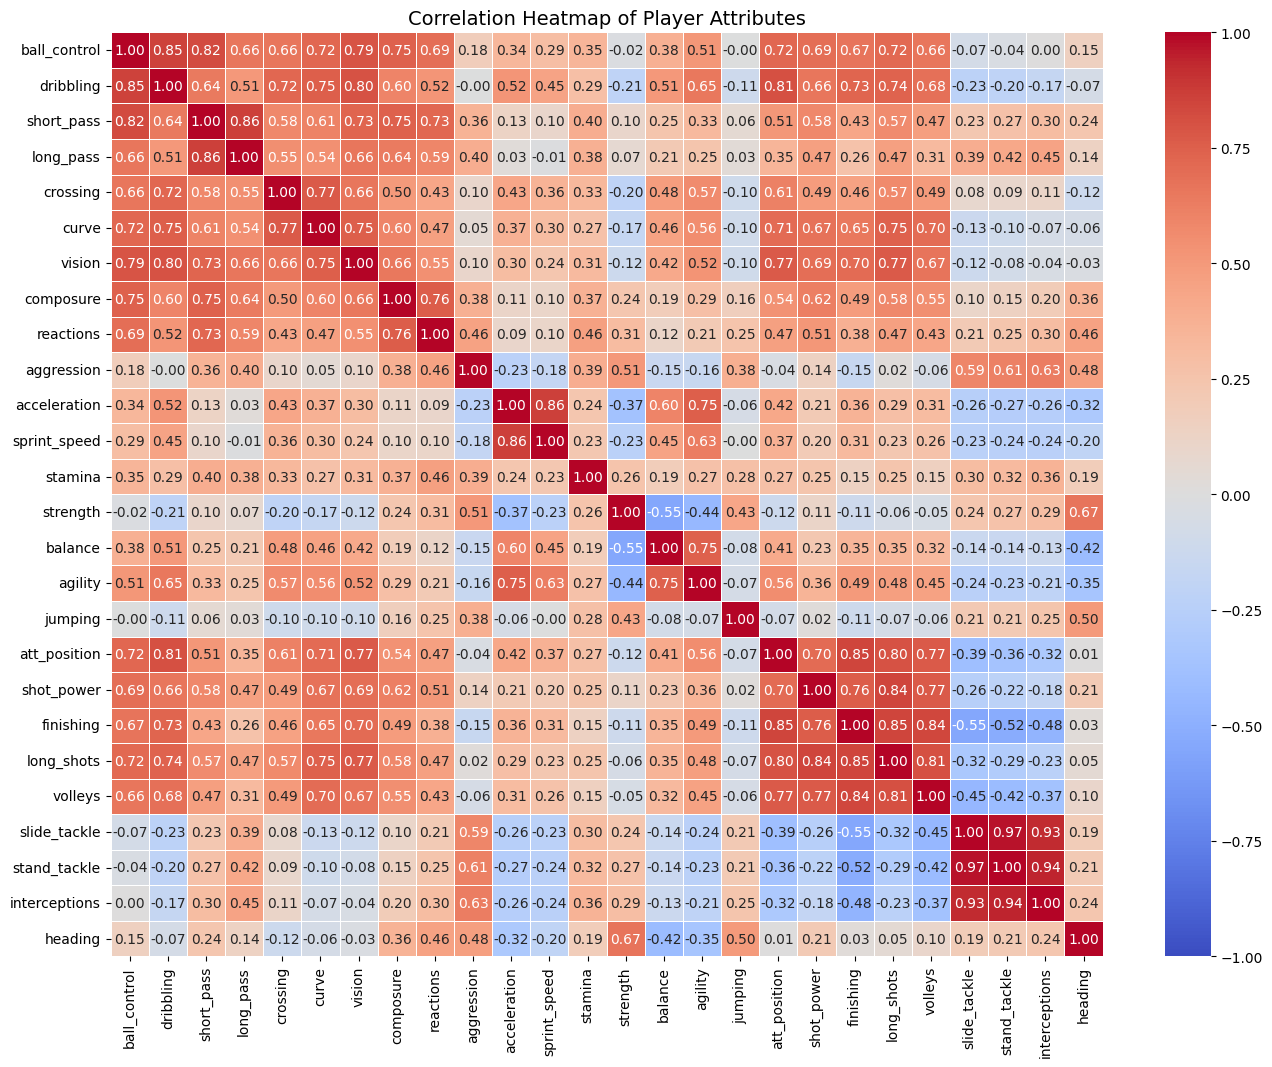

In [9]:
# HEATMAP (CORRELATION MATRIX)
corr_matrix = features.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Player Attributes", fontsize=14)
plt.show()

The heatmap reveals several interesting patterns within the dataset. Some attributes exhibit high positive correlations, meaning they tend to increase or decrease together. For example:

- Short Pass and Long Pass (0.86) are strongly correlated, which makes sense since players proficient in short passing often excel in long passing as well.
- Sprint Speed and Acceleration (0.86) show a strong relationship, as both contribute to a player’s overall movement speed.
- Stand Tackle and Slide Tackle (0.97) are almost perfectly correlated, suggesting that defensive players skilled in one type of tackling are likely to be proficient in the other.

In contrast, there are a few notable negative correlations, though they are less common. One interesting example is Balance and Strength (-0.55), implying that stronger players may sometimes have lower agility or balance, which could reflect differences in playing style (e.g., agile dribblers vs. physically dominant defenders).

While the heatmap is useful for identifying patterns in player attributes, it also highlights potential cases of **collinearity**, which occurs when two or more variables are highly correlated. In clustering models like K-Means, collinearity can pose a problem because it distorts distance calculations, making some features dominate the clustering process. This can lead to misleading results, where certain skill attributes disproportionately influence cluster formation, reducing the model’s ability to capture meaningful player groupings.

In [10]:
# Look for Collinearity
high_corr_pairs = corr_matrix[(corr_matrix > 0.85) & (corr_matrix < 1)].stack()
print(high_corr_pairs)

ball_control   dribbling        0.853361
dribbling      ball_control     0.853361
short_pass     long_pass        0.859602
long_pass      short_pass       0.859602
acceleration   sprint_speed     0.864804
sprint_speed   acceleration     0.864804
slide_tackle   stand_tackle     0.968805
               interceptions    0.928799
stand_tackle   slide_tackle     0.968805
               interceptions    0.940981
interceptions  slide_tackle     0.928799
               stand_tackle     0.940981
dtype: float64


To address collinearity, various techniques can be applied. One approach is feature selection, where highly correlated attributes are removed to prevent redundancy. However, rather than arbitrarily discarding useful information, a more effective method is **Principal Component Analysis** (PCA), which will be used in this project. PCA transforms correlated features into new independent components, reducing redundancy while preserving essential information. Additionally, standardizing the data ensures that all attributes contribute equally to distance measurements, preventing any single feature from skewing the clustering results.

By analyzing correlations and addressing collinearity, we ensure that the clustering model captures distinct patterns in player abilities rather than being biased by redundant attributes. This ultimately leads to more meaningful and interpretable clusters, helping to identify different types of players based purely on their skill sets.

To gain deeper insights into the distribution of player skills, I also created boxplots for different **categories** of attributes, including Technique, Mental, Physical, Offensive, and Defensive skills. Boxplots provide a clear visualization of the median, interquartile range, and potential outliers, allowing us to identify the spread and variability of different player abilities.

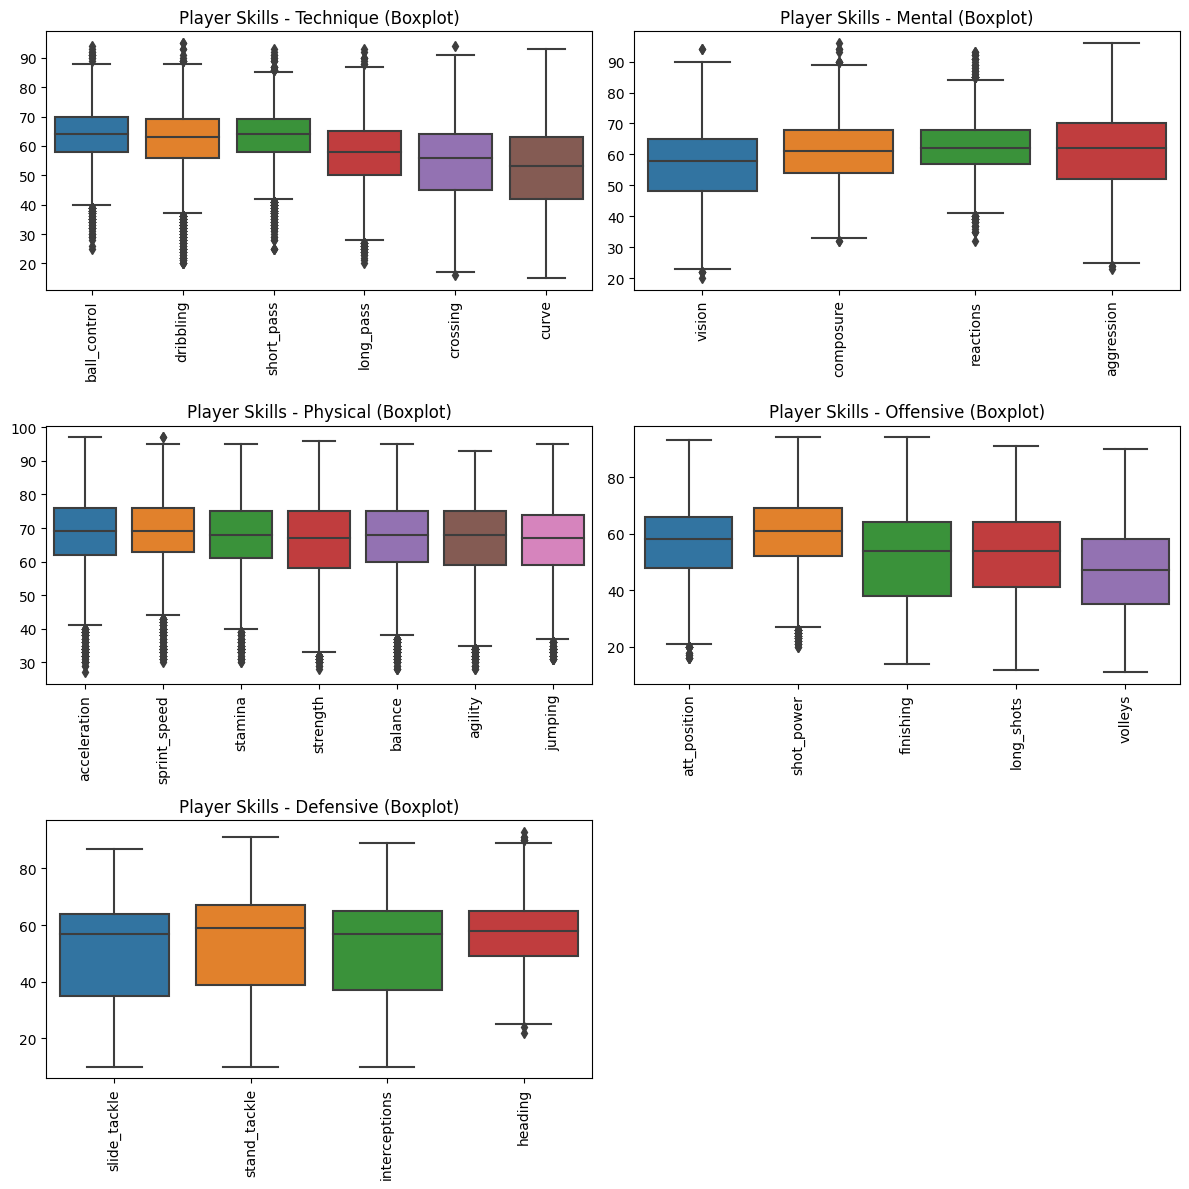

In [11]:
# Boxplots for skill distributions: show the distribution, median, and extreme values for each skill.
# This highlights the spread and any potential outliers in the dataset.

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten() if len(attribute_categories) > 1 else [axes]

# Loop through each category and plot
for i, (key, values) in enumerate(attribute_categories.items()):
    sns.boxplot(data=features[values], ax=axes[i])
    axes[i].set_title(f"Player Skills - {key} (Boxplot)")
    axes[i].tick_params(axis='x', rotation=90)  # Rotate labels for readability

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

The boxplots highlight key trends in player skill distributions: 
- **Technique**-related attributes like dribbling, ball control, and passing have high median values, showing their fundamental role in football. However, crossing and curve exhibit greater variability, as they are more specialized skills.
- **Mental** attributes show distinct patterns—vision and composure vary widely, reflecting their importance for playmakers, while aggression is right-skewed, with only some players displaying high levels. Reactions, crucial for quick decision-making, have consistently high values.
- In **physical** attributes, sprint speed and acceleration are generally high, emphasizing the importance of pace. Balance and agility are evenly distributed, while jumping has a wide range, as aerial ability is more role-dependent.
- **Offensive** skills like finishing and shot power show a broad spread, highlighting their role-specific nature. Long shots and volleys tend to have lower medians, reinforcing their specialized use.
- Finally, **defensive** attributes such as tackling and interceptions are well-balanced, though heading ability varies widely, emphasizing its relevance for certain positions like center-backs.


Boxplots help in understanding skill distribution, which is crucial for clustering analysis. They highlight which skills have a wide spread (high variability) and which are more uniform across players, helping to determine which attributes may contribute more significantly to player differentiation. Additionally, the presence of outliers suggests that some players have extremely high or low proficiency in certain areas, which could influence cluster formation.
By analyzing these distributions, we ensure that the clustering model captures meaningful differences among players rather than being biased by attributes with low variability. Moreover, the separation of skills into different categories (Technique, Mental, Physical, etc.) helps in interpreting clusters by role specialization, as certain player types (e.g., defenders vs. attackers) are expected to exhibit distinct skill distributions.

**EDA CONCLUSIONS**

The exploratory data analysis provided valuable insights into the dataset, highlighting key patterns in player attributes. The correlation heatmap revealed strong relationships between certain skills, emphasizing the presence of collinearity, which will be addressed through standardization and PCA. The boxplots illustrated the distribution of skills across different categories, showcasing variations based on positional roles and specialization in football.

These findings are essential for the clustering process, as they help understand the structure of the data and ensure that meaningful groupings can be formed. With this foundation, we can now proceed to clustering analysis.

# **FEATURES STANDARDIZATION AND PRINCIPAL COMPONENT ANALYSIS**

**STANDARDIZE FEATURES**

Before we can perform clustering, it is essential to standardize our dataset. Standardization ensures that each feature contributes equally to the distance calculations used in clustering algorithms. Features in our dataset have different units and scales; for example (even if we removed it), think about a player's pace, that might be measured on a scale of 0-100, while their weight is likely measured in kilograms. Without standardization, features with larger scales would disproportionately influence the clustering process.

We use the `sklearn.preprocessing` from the sklearn.preprocessing module to standardize our features. This scaler subtracts the mean and scales the data to unit variance. After this transformation, each feature will have a mean of 0 and a standard deviation of 1, allowing for a fair comparison across all features.

In [12]:
# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

**PRINCIPAL COMPONENT ANALYSIS**

Principal Component Analysis is a dimensionality reduction technique that helps visualize high-dimensional data in a lower-dimensional space. Using PCA for clustering decisions can be beneficial because it provides a visual representation of the data in reduced dimensions. Moreover, it helps to reduce collinearity problems.

As shown in the plot below, in order to compute the PCA, I choose to select `n_components = 2` as it retains approximately 75% of the variance, providing a good balance between dimensionality reduction and information preservation.

In [13]:
pca = PCA()
pca_features = pca.fit_transform(scaled_features)
pca.explained_variance_ratio_

array([0.40375411, 0.21293128, 0.10621076, 0.06467754, 0.02656779,
       0.02524356, 0.02043052, 0.01656018, 0.01535459, 0.01301154,
       0.01200488, 0.0101066 , 0.00895153, 0.00816031, 0.00766259,
       0.00735964, 0.00687119, 0.00625591, 0.00529038, 0.00445732,
       0.00409109, 0.00406357, 0.00344676, 0.00286137, 0.00257886,
       0.00109608])

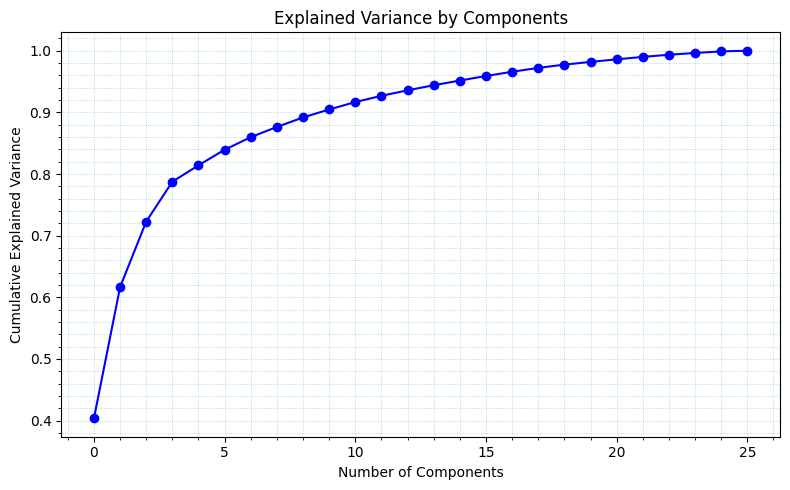

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(which='major', color='#8ec9d6', linestyle=':', linewidth=0.5)
plt.grid(which='minor', color='#8ec9d6', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [15]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# **MODELING: K-MEANS CLUSTERING**

K-Means is a centroid-based clustering algorithm that partitions data into k clusters by minimizing the variance within each group. Each data point is assigned to the nearest cluster center, which iteratively updates until convergence. Due to its efficiency, K-Means is widely used for structured and well-separated data (**!!controllare!!**). In this analysis, we applied K-Means to identify player groups based on skill attributes.

**DETERMINING THE OPTIMAL NUMBER OF CLUSTERS**

Choosing the optimal number of clusters (k) is a crucial step in the clustering process. We want to find a balance where each cluster is distinct and meaningful, without overfitting the data. Two common methods for determining the optimal number of clusters are the **Elbow Method** and the **Silhouette Score**. We try iteratively between 2 and 10 clusters, since 2 is really the minimum value (2 categories of players) and 10 is the maximum (suppose 10 outfield players).

**Elbow Method**

The Elbow Method involves running the KMeans algorithm for a range of cluster values (k) and plotting the sum of squared errors (SSE) for each k. SSE, also known as inertia, measures how compact the clusters are. As k increases, SSE decreases because the clusters become smaller. However, after a certain point, the reduction in SSE diminishes, forming an "elbow" shape in the plot. The k at this elbow point is considered optimal, as it balances between having a low SSE and avoiding too many clusters. Anyway elbow curve method could be a little ambiguous as the bend point for some datasets is not visible clearly

**Silhouette Score**

The Silhouette Score provides another way to evaluate the quality of our clusters. It measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, where a higher value indicates that the object is well-matched to its cluster and poorly matched to neighboring clusters. By computing the Silhouette Score for each k, we can identify the number of clusters that yield the highest average score, indicating the best cluster structure.

In [16]:
# Determine the optimal number of clusters
sse = []
silhouette_scores = []
k_range = range(2, 11) # try from 2 to 11 clusters (potentially 10 roles)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_features)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_features, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

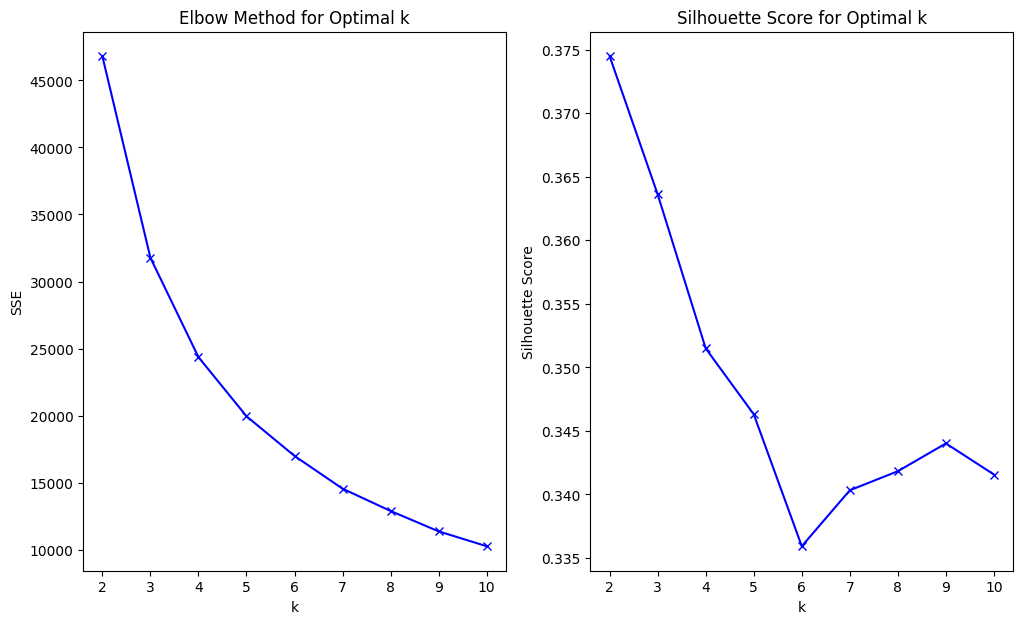

In [17]:
# Plot SSE and Silhouette scores
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.plot(k_range, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')

# is silhouette good?
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

plt.show()

While the Elbow Method and Silhouette Score are commonly used techniques, they can sometimes yield conflicting results. In this analysis, the Elbow Method did not present a clear bend, making it difficult to pinpoint the ideal number of clusters, while the Silhouette Score suggested that two clusters had the highest average score, though this would have been too simplistic for meaningful player segmentation.
To address this ambiguity, we combined multiple evaluation approaches:

 *   The **Elbow Method** helped narrow down the possible range of clusters despite the absence of a distinct elbow point.
 *   The **Silhouette Score** indicated that smaller clusters performed better, but we extended our analysis to higher cluster counts for greater interpretability.

**Conclusion**

Selecting the optimal number of clusters requires integrating insights from multiple evaluation methods, visualizations, and domain knowledge. While metrics provide guidance, the interpretability and practical relevance of the clusters are equally important. In this case, we determined that 4 clusters offer a well-balanced and meaningful segmentation of the dataset, aligning with natural groupings of player roles. Incorporating domain expertise ensures that the clustering results are not only statistically valid but also useful for real-world analysis.


**TRAIN MODEL**

Now we train the model on `pca_features` (i.e. the features after PCA) and group them in 4 clusters.

The following clustering visualization gives us the confirmation that the choice of `optimal_k = 4` is a good fit. The data points in the scatter plot form four distinct groups which appear visually well-defined and own the necessary granularity for meaningful analysis.

In [18]:
# K-Means Clustering: Model Training
# Choose optimal k=4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(pca_features)
df['cluster_kmeans'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


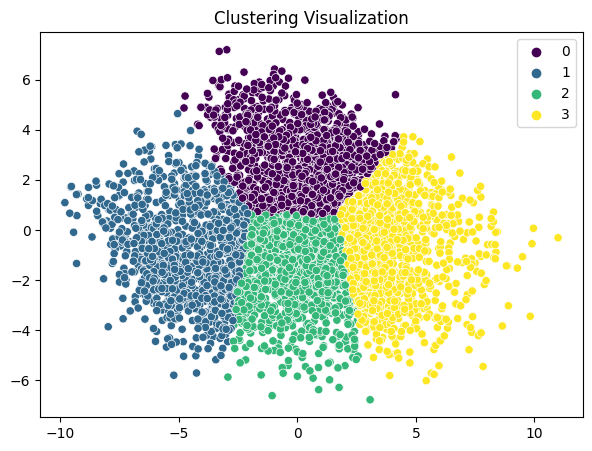

In [19]:
# Visualize clusters
plt.figure(figsize=(7, 5))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters, palette='viridis')
plt.title('Clustering Visualization')
plt.show()

# K-Means Clustering Analysis

For the interpretation of the k-means clustering results, I created a new dataframe, containing only the relevant features along with their assigned cluster labels. Then I computed the standardized mean values of each attribute for the four clusters to analyze their distinguishing characteristics and displayed them with barplots.\
Additionally, I identifyed the top players in each cluster, and their name, club, age, and market value were displayed to provide further insights into the composition of each group.

In [20]:
# Analyze cluster characteristics
# Create a DataFrame that contains only the relevant features and cluster labels
clustered_df = pd.DataFrame(scaled_features, columns=feat_select)
clustered_df['cluster_kmeans'] = clusters

# Calculate the mean values for each cluster
cluster_analysis = clustered_df.groupby('cluster_kmeans').mean()
cluster_analysis

ball_control  dribbling  short_pass  long_pass  crossing  \
cluster_kmeans                                                             
0                  -0.128668   0.143832   -0.495886  -0.603220 -0.184057   
1                  -1.207156  -1.367381   -0.875293  -0.701918 -1.023470   
2                   0.098058   0.016495    0.299081   0.419003  0.167576   
3                   1.116060   1.035246    1.010963   0.837887  0.933074   

                   curve    vision  composure  reactions  aggression  ...  \
cluster_kmeans                                                        ...   
0              -0.032436 -0.033768  -0.430394  -0.630250   -0.959642  ...   
1              -1.193571 -1.301984  -0.836107  -0.579909    0.145203  ...   
2               0.001069  0.102272   0.167213   0.217491    0.558053  ...   
3               1.107006  1.083491   1.057533   1.004019    0.333016  ...   

                 jumping  att_position  shot_power  finishing  long_shots  \
cluster_kmeans                                                              
0              -0.515608      0.244111    0.069290   0.473452    0.166251   
1               0.223651     -1.369463   -1.213327  -1.327937   -1.350406   
2               0.262016     -0.064934    0.003002  -0.273411   -0.033555   
3               0.094082      1.016640    1.001812   0.959472    1.053929   

                 volleys  slide_tackle  stand_tackle  interceptions   heading  
cluster_kmeans                                                                 
0               0.276498     -1.020977     -1.060624      -1.083664 -0.582974  
1              -1.181029      0.561009      0.540673       0.476173  0.189360  
2              -0.276899      0.653596      0.639864       0.660142  0.244486  
3               1.065439     -0.082426     -0.000616       0.060006  0.225841  

[4 rows x 26 columns]

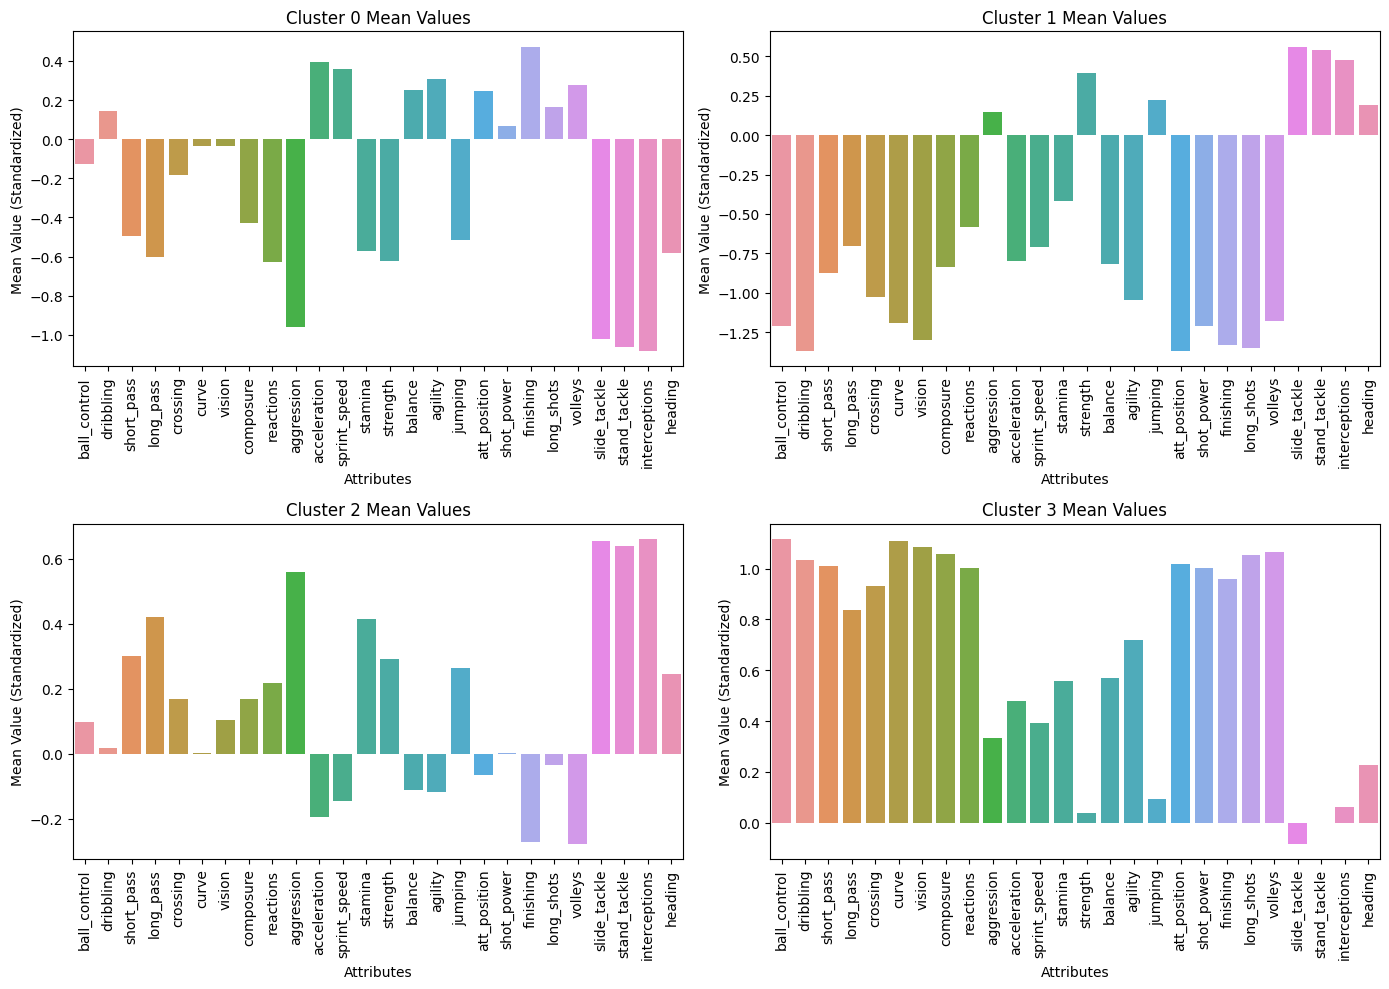

In [21]:
# Standardized mean value for each attribute in the 4 clusters
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten() if optimal_k > 1 else [axes]

# Loop through clusters and plot
for i, cluster_num in enumerate(range(optimal_k)):
    cluster_data = cluster_analysis.loc[cluster_num]  # Extract cluster data
    sns.barplot(x=cluster_data.index, y=cluster_data.values, ax=axes[i])
    axes[i].set_title(f'Cluster {cluster_num} Mean Values')
    axes[i].set_xlabel('Attributes')
    axes[i].set_ylabel('Mean Value (Standardized)')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate labels for readability

# Adjust layout
plt.tight_layout()
plt.show()

In [22]:
# Identify top players in each cluster
top_players_info = []
for cluster_num in range(optimal_k):
    cluster_players = df[df['cluster_kmeans'] == cluster_num]
    top_player = cluster_players.loc[cluster_players['value'].idxmax()]
    top_players_info.append({
        'player': top_player['player'],
        'club': top_player['club'],
        'age': top_player['age'],
        'value': top_player['value']
    })

# Display top players' information
for i, player_info in enumerate(top_players_info):
    print(f"Cluster {i}: {player_info['player']} (Club: {player_info['club']}, Age: {player_info['age']}, Value: {player_info['value']:.2f} Mln. $)")

Cluster 0: Brandon Vazquez (Club: FC Cincinnati , Age: 24, Value: 3.60 Mln. $)
Cluster 1: David Carmo (Club: FC Porto , Age: 24, Value: 11.00 Mln. $)
Cluster 2: Virgil van Dijk (Club: Liverpool , Age: 32, Value: 84.50 Mln. $)
Cluster 3: Kylian MbappÃ© (Club: Paris SG , Age: 24, Value: 153.50 Mln. $)


At this point, in order to gain deeper insight into the skill distribution of each cluster, I used radar charts to visualize better the mean attribute values and make a comparison between clusters.

In [23]:
# Function to create radar chart
def plot_radar_chart(ax, cluster_data, cluster_num, min_range, max_range):
    labels = cluster_data.index
    values = cluster_data.values
    num_vars = len(labels)

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values = np.concatenate((values, [values[0]]))
    angles += angles[:1]

    # Plot
    ax.fill(angles, values, color='red', alpha=0.25)
    ax.plot(angles, values, color='red', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Set same range for all charts
    ax.set_ylim(min_range, max_range)

    # Title
    ax.set_title(f'Cluster {cluster_num} Mean Values', size=15, color='red', y=1.1)


min_range_k = -1.3694632103250275  max_range_k = 1.11605987794651


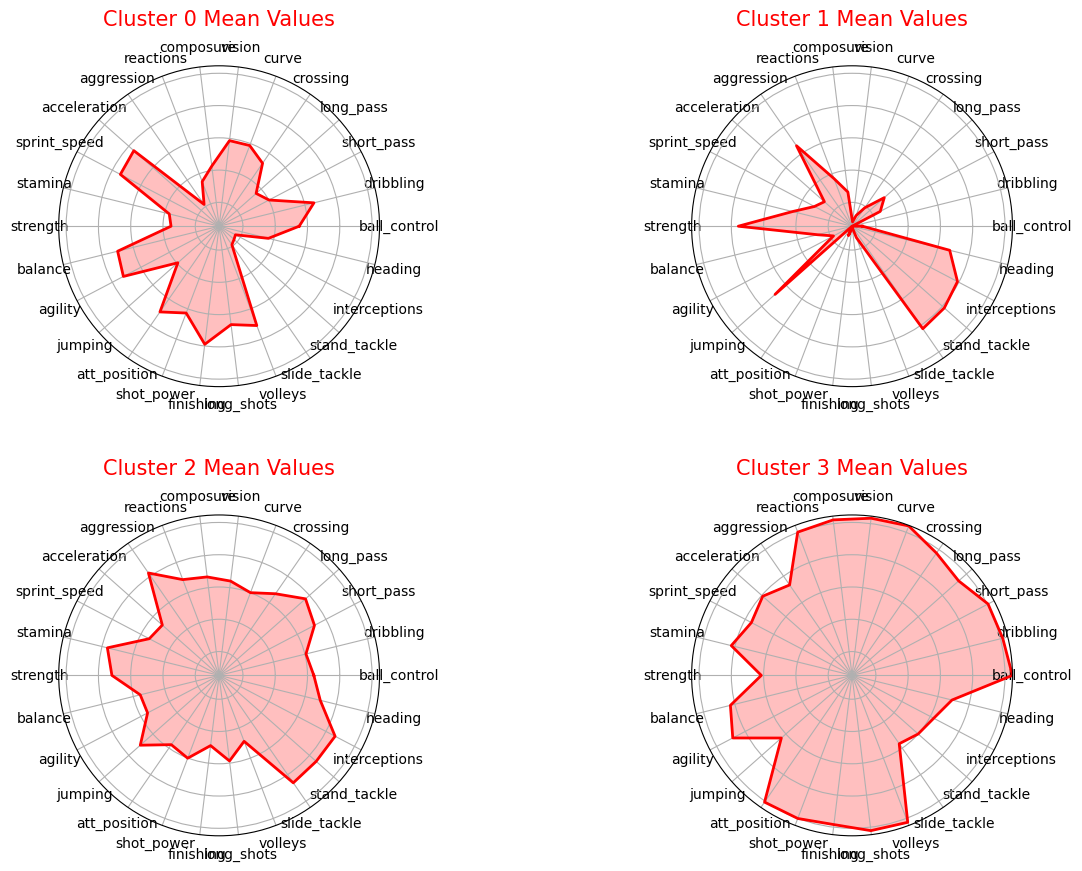

In [24]:
# Show 4 clusters
# Define max range for all attributes in order to have the same scale
max_range_k = cluster_analysis.max().max()
min_range_k = cluster_analysis.min().min()
print("min_range_k =", min_range_k, " max_range_k =", max_range_k)

# Plot radar charts in 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10), subplot_kw=dict(polar=True))

# Adjust space between plots
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot each cluster's radar chart
for i, ax in enumerate(axs.flat):
    if i < optimal_k:
        cluster_data = cluster_analysis.loc[i]
        plot_radar_chart(ax, cluster_data, i, min_range_k, max_range_k)
    else:
        fig.delaxes(ax)  # Remove possibly empty subplots

plt.show()

These charts provide an intuitive representation of strengths and weaknesses across different player groups:

- **Cluster 0**: shows a distinct mix of physical and attacking attributes, with strong values in finishing, shot power, positioning, and sprint speed. This suggests a cluster of attacking players, possibly strikers or offensive midfielders who rely on power and movement rather than finesse.
  
- **Cluster 1**: is quite unbalanced towards a very defensively oriented profile, with solid values in tackling, interceptions, and aerial duels but also in physical attributes such as strenght and aggression. The attributes align with center-backs or defensive midfielders who focus on stopping opponents rather than contributing to build-up play.

- **Cluster 2**: represents physically strong and athletic players. They have high values in stamina, strength, and aggression, which are crucial for physical duels and endurance on the pitch. Their values in jumping and interceptions are also notable, suggesting a role that requires quick movements and aerial ability. However, their technical attributes such as ball control, dribbling, curve and crossing are relatively low, indicating that these players may not be creative playmakers but rather defensive-minded or box-to-box players who rely on their physicality rather than finesse. This cluster could correspond to defensive midfielders or physically dominant defenders which are top-class in their role.

- **Cluster 3**: has an expansive shape, indicating well-rounded players with high values in technical skills such as ball control, dribbling, and passing. The attacking abilities are also outstanding, suggesting top-tier players in their roles. The combination of agility and offensive traits suggests creative offensive midfielders or forwards who excel in playmaking and finishing.

Overall, the radar charts reinforce the clustering results by highlighting clear patterns in skill distribution. This visualization effectively differentiates player roles, providing valuable insights for tactical analysis or player scouting.

In [25]:
# Function to create overlapped radar chart for two clusters
def plot_overlapped_radar_chart(ax, cluster_data_1, cluster_num_1, cluster_data_2, cluster_num_2, min_range, max_range):
    labels = cluster_data_1.index
    values_1 = cluster_data_1.values
    values_2 = cluster_data_2.values
    num_vars = len(labels)

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values_1 = np.concatenate((values_1, [values_1[0]]))
    values_2 = np.concatenate((values_2, [values_2[0]]))
    angles += angles[:1]

    # Highlight sector boundaries
    start_angle = 0
    for i, (category, attrs) in enumerate(attribute_categories.items()):
        num_attrs = len(attrs)
        end_angle = start_angle + (num_attrs / num_vars) * 2 * np.pi
        ax.plot([start_angle, start_angle], [0, max_range], color='grey', linewidth=2, linestyle='--')
        start_angle = end_angle
    # Plot the last boundary to close the circle
    ax.plot([end_angle, end_angle], [0, max_range], color='grey', linewidth=2, linestyle='--')


    # Plot first cluster
    ax.fill(angles, values_1, color='red', alpha=0.25, label=f'Cluster {cluster_num_1}')
    ax.plot(angles, values_1, color='red', linewidth=2)

    # Plot second cluster
    ax.fill(angles, values_2, color='blue', alpha=0.25, label=f'Cluster {cluster_num_2}')
    ax.plot(angles, values_2, color='blue', linewidth=2)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Set same range for all charts
    ax.set_ylim(min_range, max_range)

    # Title
    ax.set_title(f'Cluster {cluster_num_1} vs Cluster {cluster_num_2}', size=15, color='black', y=1.1)

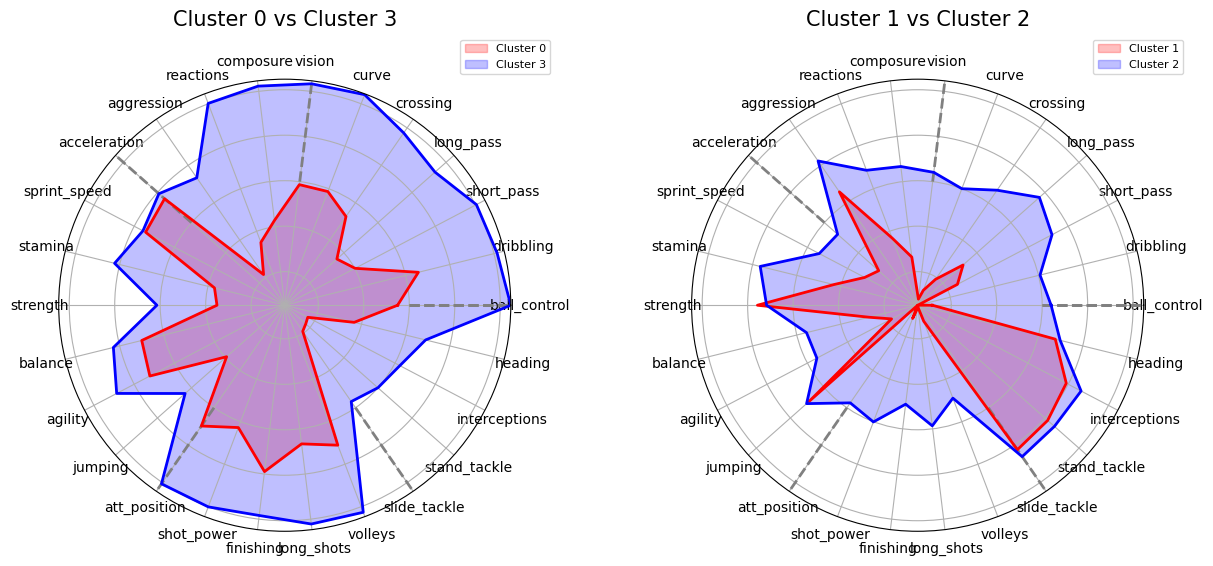

In [26]:
# Plot radar charts in a 1x2 grid
fig, axs = plt.subplots(1, 2, figsize=(14, 10), subplot_kw=dict(polar=True))

# Adjust the space between plots
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot each cluster's radar chart
for i, ax in enumerate(axs.flat):
    if i == 0:
        cluster_num_1 = 0
        cluster_num_2 = 3
        cluster_data_1 = cluster_analysis.loc[cluster_num_1]
        cluster_data_2 = cluster_analysis.loc[cluster_num_2]
        plot_overlapped_radar_chart(ax, cluster_data_1, cluster_num_1, cluster_data_2, cluster_num_2, min_range_k, max_range_k)
        ax.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1), fontsize=8)
    else:
        cluster_num_1 = 1
        cluster_num_2 = 2
        cluster_data_1 = cluster_analysis.loc[cluster_num_1]
        cluster_data_2 = cluster_analysis.loc[cluster_num_2]
        plot_overlapped_radar_chart(ax, cluster_data_1, cluster_num_1, cluster_data_2, cluster_num_2, min_range_k, max_range_k)
        ax.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1), fontsize=8)

plt.show()

The radar chart on the left compares Cluster 0 and Cluster 3, which exhibit contrasting skill profiles. Cluster 3 (blue) dominates across almost all technical and creative attributes, such as ball control, dribbling, passing, and vision, suggesting that this group consists of highly skilled, attack-minded players—likely playmakers or offensive midfielders. Players included in this cluster are top-tier attacking players, such as strikers or offensive midfielders that are top in their roles.
On the other hand, Cluster 0 (red), is totally included in the blue shadow and has relatively lower values in the areas mentioned before, but shows good balance, agility, acceleration and sprint speed, indicating an offensive, but mainly physical profile. This suggests that Cluster 0 represents robust, hardworking players, potentially offensive midfielders or strikers, who rely more on physicality rather than refined technical skills. For this reason we can fairly consider them as second-tier offensive players.

The radar chart on the right compares Cluster 1 and Cluster 2, both of which represent defensive players. However, key differences emerge in their skill distributions.\
Cluster 2 (blue) shows higher values in attributes related to overall defensive capabilities, such as interceptions, stand tackle, and stamina, suggesting a more well-rounded defensive profile.
In contrast, Cluster 1 (red) emphasizes strength, aggression and tackling ability, indicating a focus on aerial duels and physical presence rather than mobility or technical defensive skills.
This distinction suggests that Cluster 2 may consist of top-tier defenders, while Cluster 1 includes physically oriented defenders who may be sub-ins or rotational players.

# **MODELING: AGGLOMERATIVE (HIERARCHICAL) CLUSTERING**

Agglomerative Clustering is a hierarchical method that starts with each data point as its own cluster and progressively merges the closest pairs until a desired number of clusters is reached. Unlike K-Means, it does not require predefining k but instead forms a hierarchy of nested clusters.

To ensure a meaningful comparison with K-Means, we set `n_clusters=4` for Agglomerative Clustering. This aligns with our previous choice in K-Means, where we determined 4 clusters based on multiple evaluation methods, visualizations, and domain knowledge. Keeping the same number of clusters allows us to evaluate how different clustering techniques segment the data.

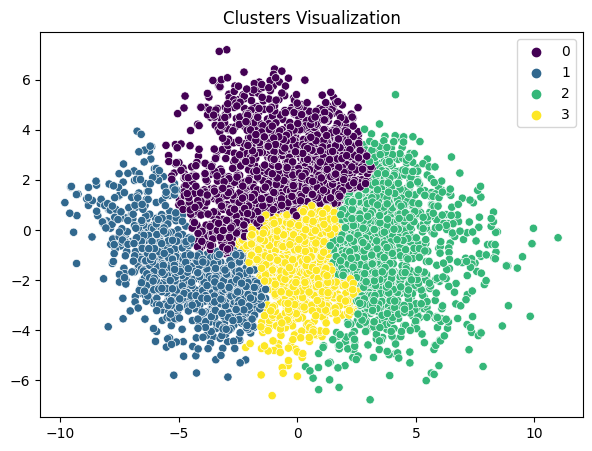

In [27]:
agg_cluster = AgglomerativeClustering(n_clusters=4)
clusters = agg_cluster.fit_predict(pca_features)
df['cluster_agg'] = clusters

plt.figure(figsize=(7, 5))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters Visualization')
plt.show()

# Agglomerative Clustering Analysis

To interpret the Agglomerative Clustering results, I generated a new dataframe that includes only the relevant features alongside their assigned cluster labels. I then calculated the standardized mean values for each attribute within the four clusters to highlight their key characteristics, visualizing the results using barplots.
Additionally, I identified the top players in each cluster and displayed their name, club, age, and market value to gain deeper insights into the composition of each group.

In [28]:
# Analyze cluster characteristics
# Create a DataFrame that contains only the relevant features and cluster labels
clustered_df = pd.DataFrame(scaled_features, columns=feat_select)
clustered_df['cluster_agg'] = clusters

In [29]:
# Calculate the mean values for each cluster
cluster_analysis_agg = clustered_df.groupby('cluster_agg').mean()
cluster_analysis_agg

ball_control  dribbling  short_pass  long_pass  crossing  \
cluster_agg                                                             
0               -0.329965  -0.044693   -0.633975  -0.685447 -0.239338   
1               -1.127987  -1.462653   -0.682173  -0.510741 -1.184987   
2                1.053189   0.975016    0.968837   0.818380  0.872221   
3                0.090314   0.051355    0.250835   0.357576  0.213250   

                curve    vision  composure  reactions  aggression  ...  \
cluster_agg                                                        ...   
0           -0.196424 -0.246830  -0.630766  -0.734416   -0.850293  ...   
1           -1.269028 -1.303347  -0.530947  -0.320407    0.374498  ...   
2            1.031462  1.031579   0.999272   0.943842    0.330074  ...   
3            0.044433  0.134211   0.103490   0.144928    0.462282  ...   

              jumping  att_position  shot_power  finishing  long_shots  \
cluster_agg                                                              
0           -0.467394      0.042846   -0.204172   0.169359   -0.089561   
1            0.432589     -1.517602   -1.080812  -1.353922   -1.349709   
2            0.100783      0.941796    0.941091   0.881736    0.982119   
3            0.177819      0.014836    0.016760  -0.201313    0.019367   

              volleys  slide_tackle  stand_tackle  interceptions   heading  
cluster_agg                                                                 
0            0.012432     -0.803243     -0.852544      -0.884291 -0.596776  
1           -1.177264      0.712759      0.704816       0.653361  0.552232  
2            0.963039     -0.029623      0.044325       0.097379  0.213131  
3           -0.216459      0.550183      0.538453       0.558601  0.134553  

[4 rows x 26 columns]

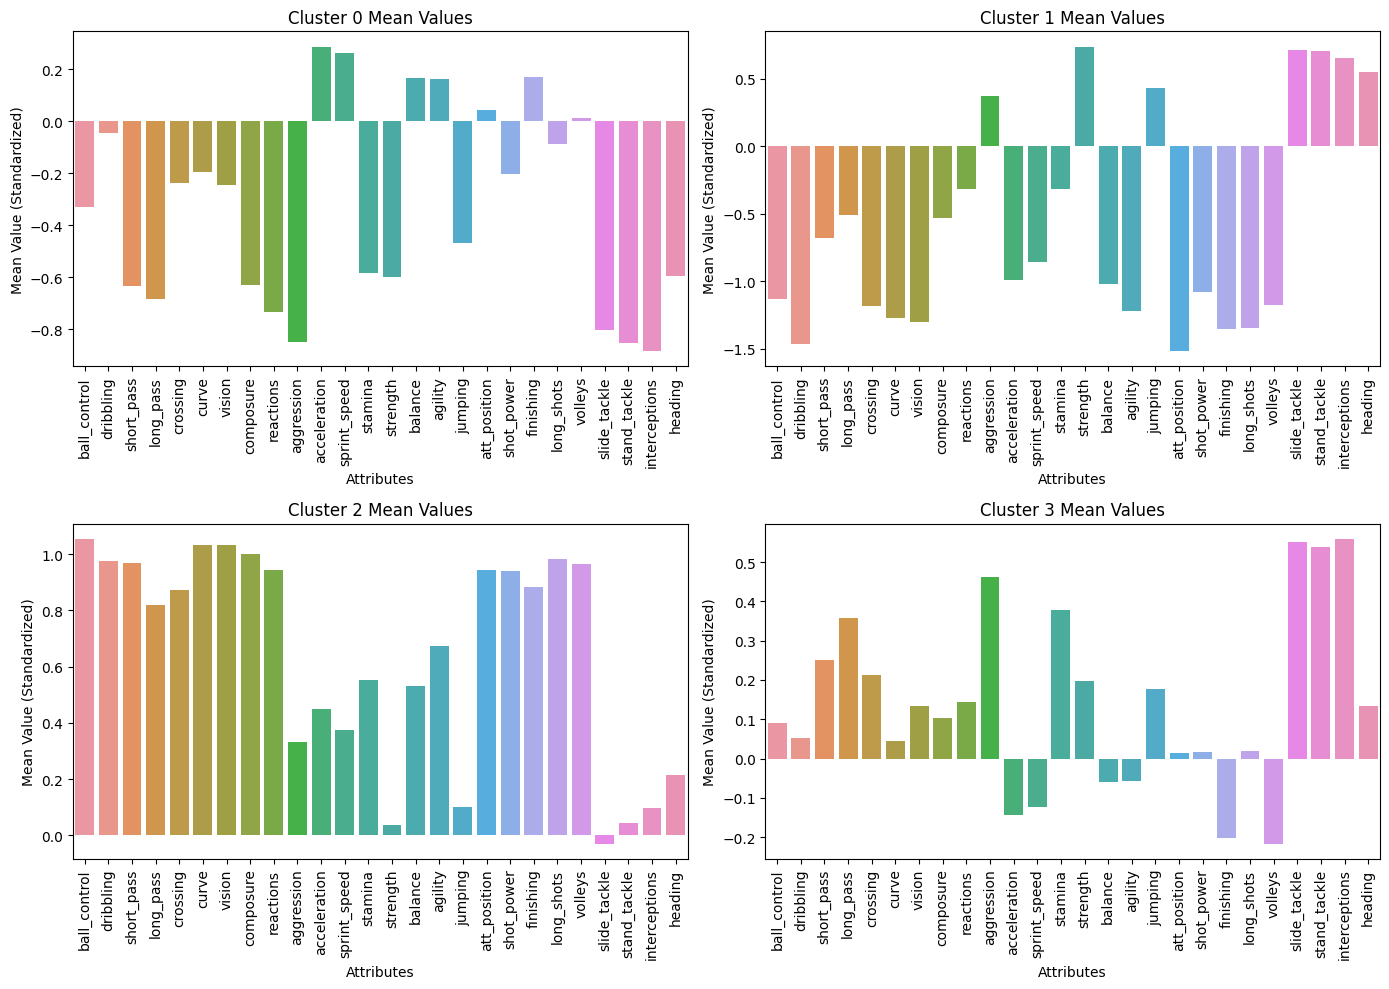

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten() if optimal_k > 1 else [axes]

# Loop through clusters and plot
for i, cluster_num in enumerate(range(optimal_k)):
    cluster_data = cluster_analysis_agg.loc[cluster_num]  # Extract cluster data
    sns.barplot(x=cluster_data.index, y=cluster_data.values, ax=axes[i])
    axes[i].set_title(f'Cluster {cluster_num} Mean Values')
    axes[i].set_xlabel('Attributes')
    axes[i].set_ylabel('Mean Value (Standardized)')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate labels for readability

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [31]:
# Identify top players in each cluster
top_players_info = []
for cluster_num in range(optimal_k):
    cluster_players = df[df['cluster_agg'] == cluster_num]
    top_player = cluster_players.loc[cluster_players['value'].idxmax()]
    top_players_info.append({
        'player': top_player['player'],
        'club': top_player['club'],
        'age': top_player['age'],
        'value': top_player['value']
    })

# Display top players' information
for i, player_info in enumerate(top_players_info):
    print(f"Cluster {i}: {player_info['player']} (Club: {player_info['club']}, Age: {player_info['age']}, Value: {player_info['value']:.2f})")

Cluster 0: Federico Bonazzoli (Club: Salernitana , Age: 26, Value: 3.40)
Cluster 1: IbaÃ±ez (Club: Roma , Age: 24, Value: 26.00)
Cluster 2: Kylian MbappÃ© (Club: Paris SG , Age: 24, Value: 153.50)
Cluster 3: Dayot Upamecano (Club: FC Bayern MÃ¼nchen , Age: 24, Value: 36.50)


Just like with K-Means clustering, I used radar charts to gain deeper insight into the skill distribution of each cluster. These visualizations help illustrate the mean attribute values, making it easier to compare the different clusters and understand their unique characteristics.

min_range_agg -1.5176020238475336   max_range_agg 1.0531889337619131


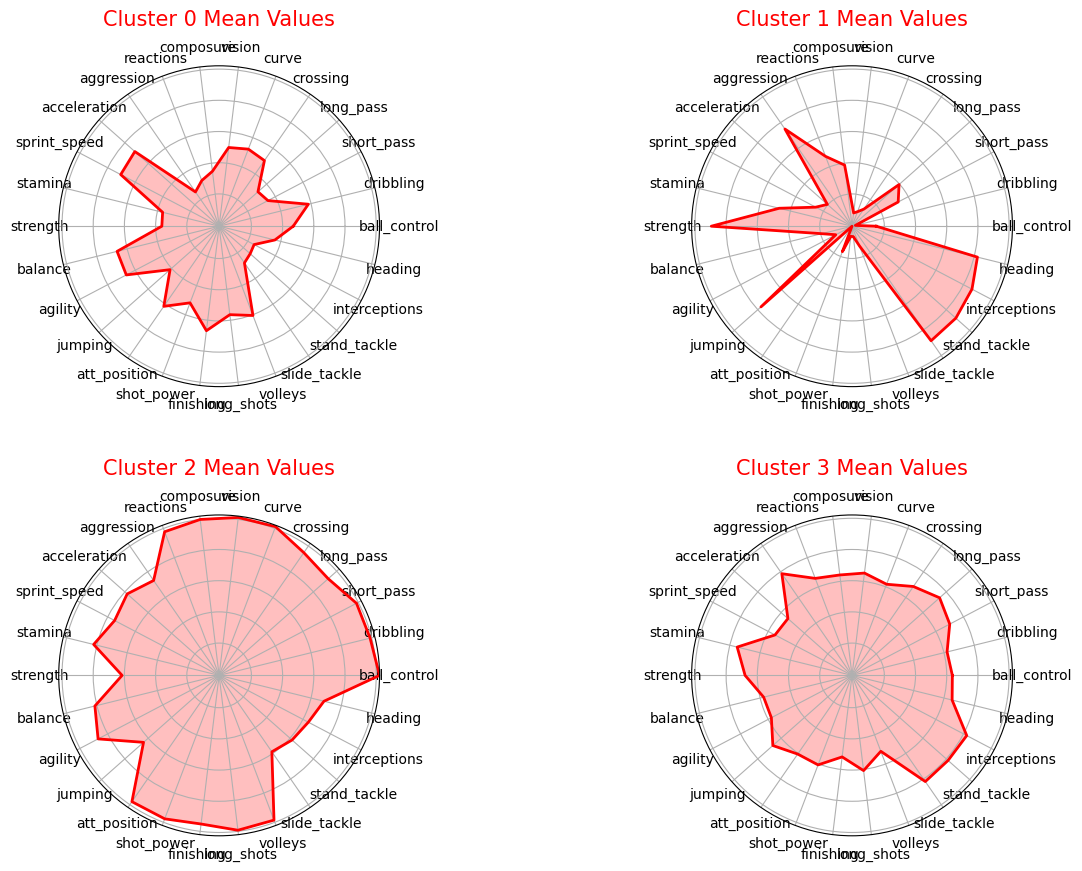

In [32]:
max_range_agg = cluster_analysis_agg.max().max()
min_range_agg = cluster_analysis_agg.min().min()
print("min_range_agg",min_range_agg,"  max_range_agg",max_range_agg)

# Plot radar charts in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10), subplot_kw=dict(polar=True))

# Adjust the space between plots
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot each cluster's radar chart
for i, ax in enumerate(axs.flat):
    if i < optimal_k:
        cluster_data = cluster_analysis_agg.loc[i]
        plot_radar_chart(ax, cluster_data, i, min_range_agg, max_range_agg)
    else:
        fig.delaxes(ax)  # Remove possibly empty subplots

plt.show()

The radar charts for Agglomerative Clustering reveal similar patterns to those observed in K-Means, reinforcing the consistency of the clustering approach:  

- **Cluster 0** groups attacking players with strong finishing, shot power, and sprint speed, likely strikers or offensive midfielders.
- **Cluster 1** consists of defensively players excelling in tackling, interceptions, and aerial duels, matching center-backs or defensive midfielders.
- **Cluster 2** represents technically gifted players with strong dribbling, ball control, and passing, resembling creative midfielders or forwards.
- **Cluster 3** highlights physically dominant players with high stamina, strength, and aggression, suggesting box-to-box midfielders or defensive enforcers.

These results closely align with K-Means, confirming the robustness of the player segmentation.

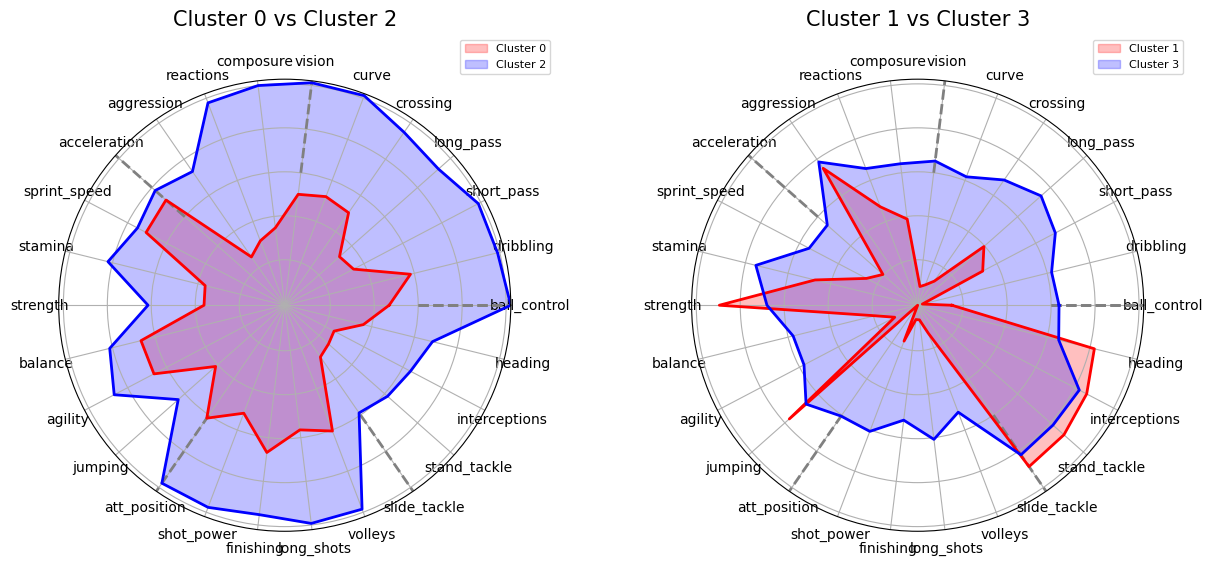

In [33]:
# Plot radar charts in a 1x2 grid
fig, axs = plt.subplots(1, 2, figsize=(14, 10), subplot_kw=dict(polar=True))

# Adjust the space between plots
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot each cluster's radar chart
for i, ax in enumerate(axs.flat):
    if i == 0:
        cluster_num_1 = 0
        cluster_num_2 = 2
        cluster_data_1 = cluster_analysis_agg.loc[cluster_num_1]
        cluster_data_2 = cluster_analysis_agg.loc[cluster_num_2]
        plot_overlapped_radar_chart(ax, cluster_data_1, cluster_num_1, cluster_data_2, cluster_num_2, min_range_agg, max_range_agg)
        ax.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1), fontsize=8)
    else:
        cluster_num_1 = 1
        cluster_num_2 = 3
        cluster_data_1 = cluster_analysis_agg.loc[cluster_num_1]
        cluster_data_2 = cluster_analysis_agg.loc[cluster_num_2]
        plot_overlapped_radar_chart(ax, cluster_data_1, cluster_num_1, cluster_data_2, cluster_num_2, min_range_agg, max_range_agg)
        ax.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1), fontsize=8)
        
plt.show()

The left radar chart, similar to the K-Means results, contrasts Cluster 0 and Cluster 2. Cluster 2 (blue) excels in technical and creative skills, representing top-tier offensive players like playmakers or attacking midfielders. Cluster 0 (red) falls within Cluster 2’s range but stands out for speed and physicality, indicating hardworking yet less technically refined offensive players.  

The right radar chart, also mirroring K-Means trends, compares defensive profiles. Cluster 3 (blue) has a well-rounded defensive skill set, excelling in interceptions and stamina, suggesting high-level defenders. Cluster 1 (red) is more physically dominant, prioritizing strength and aggression over technical ability, likely representing aerially strong but less mobile defenders.

# **MODELING: GAUSSIAN MIXTURE MODEL**

Gaussian Mixture Model (GMM) is a soft clustering method consisting in a probabilistic clustering technique that assumes data is generated from a mixture of multiple Gaussian distributions. Unlike K-Means and Agglomerative Clustering, which enforce hard assignments, GMM allows for more flexibility in cases where player attributes overlap.

To maintain consistency across clustering methods, we set `n_components=4` for the Gaussian Mixture Model. This allows for a direct comparison with K-Means and Agglomerative Clustering, where the same number of clusters was chosen. By doing so, we can better analyze how each technique segments the data.

Silhouette Score: 0.3402696633900162


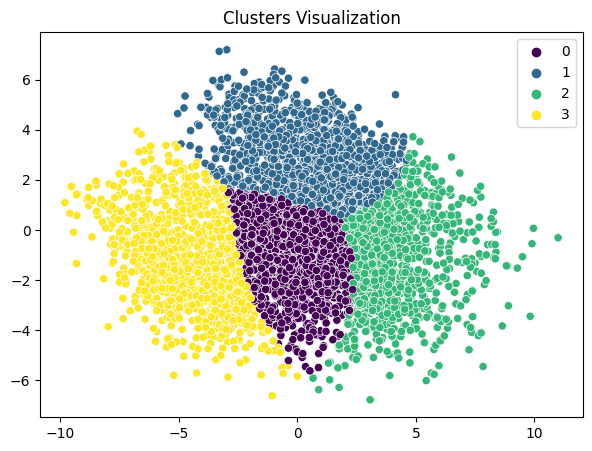

In [34]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
clusters = gmm.fit_predict(pca_features)

silhouette = silhouette_score(pca_features, clusters)
print(f"Silhouette Score: {silhouette}")
df['cluster_gmm'] = clusters

plt.figure(figsize=(7, 5))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters Visualization')
plt.show()

# GMM Analysis

As with K-Means and Agglomerative Clustering, I created a new dataframe containing only the relevant features and their assigned cluster labels for the GMM model. I then computed the standardized mean values of each attribute for the four clusters and visualized them using bar plots to highlight their distinguishing characteristics. Additionally, I identified the top players in each cluster, displaying their name, club, age, and market value to provide further insight into the composition of each group.

In [35]:
# Analyze cluster characteristics
# Create a DataFrame that contains only the relevant features and cluster labels
clustered_df = pd.DataFrame(scaled_features, columns=feat_select)
clustered_df['cluster_gmm'] = clusters

In [36]:
# Calculate the mean values for each cluster
cluster_analysis_gmm = clustered_df.groupby('cluster_gmm').mean()
cluster_analysis_gmm

ball_control  dribbling  short_pass  long_pass  crossing  \
cluster_gmm                                                             
0                0.024681   0.028388    0.173690   0.282866  0.179169   
1               -0.025476   0.238057   -0.422963  -0.565102 -0.108728   
2                1.209355   1.076093    1.152474   0.993299  1.002508   
3               -1.138436  -1.375834   -0.770958  -0.593317 -1.064014   

                curve    vision  composure  reactions  aggression  ...  \
cluster_gmm                                                        ...   
0            0.023436  0.096227   0.004967   0.045896    0.386335  ...   
1            0.065344  0.028014  -0.333933  -0.528067   -0.974323  ...   
2            1.158283  1.176827   1.192454   1.151380    0.503956  ...   
3           -1.211617 -1.288069  -0.675054  -0.435139    0.264779  ...   

              jumping  att_position  shot_power  finishing  long_shots  \
cluster_gmm                                                              
0            0.134191      0.010093   -0.036535  -0.211030   -0.020567   
1           -0.496736      0.319413    0.161209   0.562504    0.254741   
2            0.170794      1.047131    1.062884   0.953899    1.095573   
3            0.310404     -1.431289   -1.161579  -1.340065   -1.343017   

              volleys  slide_tackle  stand_tackle  interceptions   heading  
cluster_gmm                                                                 
0           -0.234967      0.507054      0.498886       0.512116  0.037507  
1            0.385275     -1.104016     -1.138902      -1.155197 -0.546032  
2            1.078377      0.097120      0.177460       0.241134  0.347599  
3           -1.180861      0.640774      0.624876       0.567228  0.356708  

[4 rows x 26 columns]

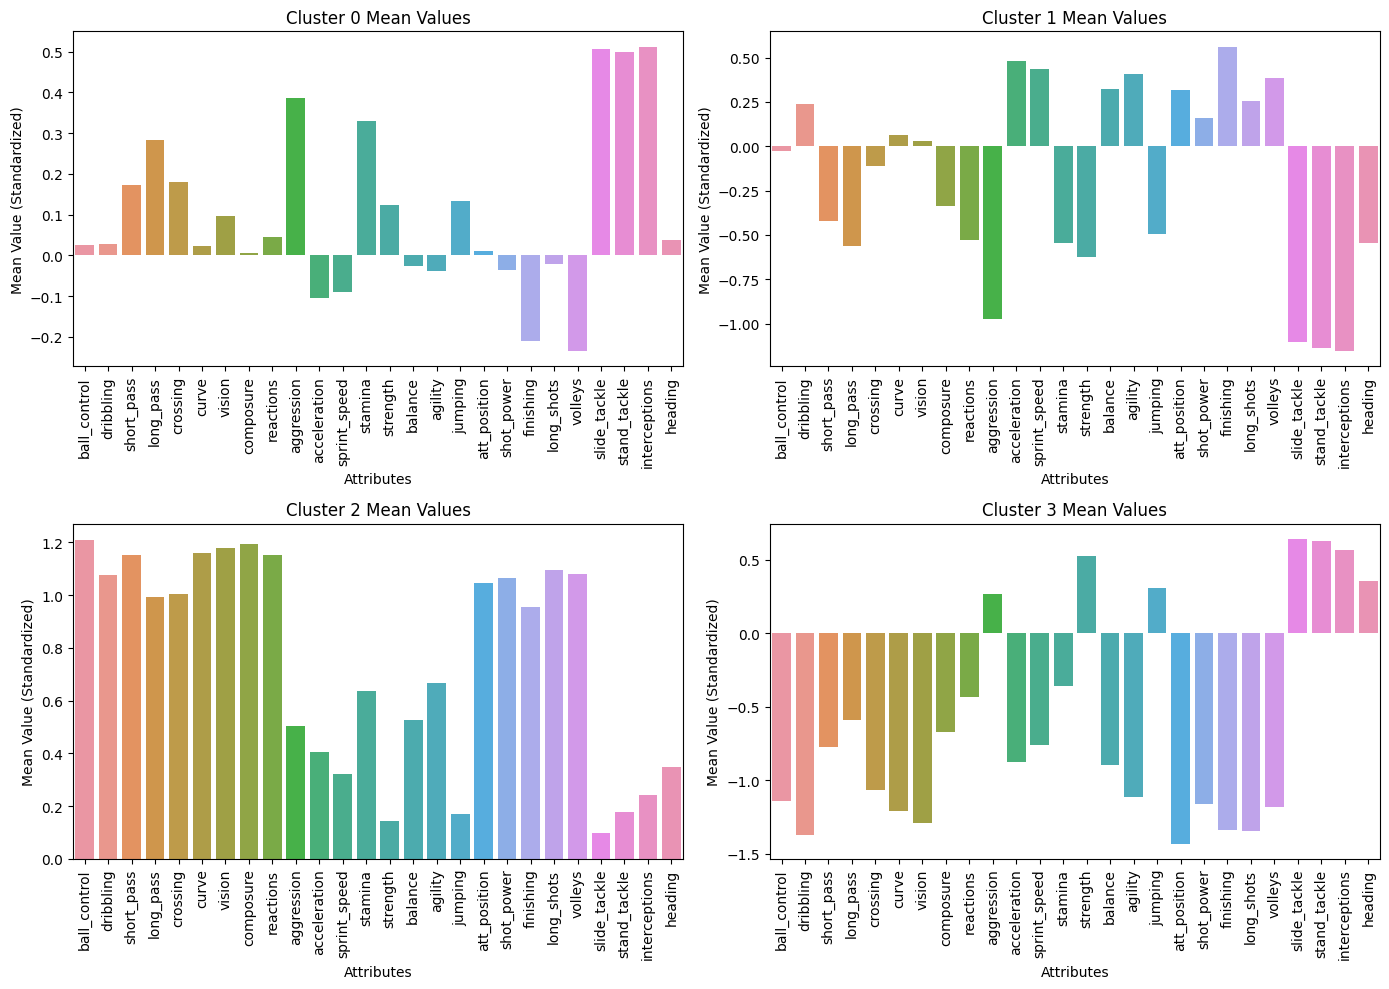

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten() if optimal_k > 1 else [axes]

# Loop through clusters and plot
for i, cluster_num in enumerate(range(optimal_k)):
    cluster_data_gmm = cluster_analysis_gmm.loc[cluster_num]  # Extract cluster data
    sns.barplot(x=cluster_data_gmm.index, y=cluster_data_gmm.values, ax=axes[i])
    axes[i].set_title(f'Cluster {cluster_num} Mean Values')
    axes[i].set_xlabel('Attributes')
    axes[i].set_ylabel('Mean Value (Standardized)')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate labels for readability

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [38]:
# Identify top players in each cluster
top_players_info = []
for cluster_num in range(optimal_k):
    cluster_players = df[df['cluster_gmm'] == cluster_num]
    top_player = cluster_players.loc[cluster_players['value'].idxmax()]
    top_players_info.append({
        'player': top_player['player'],
        'club': top_player['club'],
        'age': top_player['age'],
        'value': top_player['value']
    })

# Display top players' information
for i, player_info in enumerate(top_players_info):
    print(f"Cluster {i}: {player_info['player']} (Club: {player_info['club']}, Age: {player_info['age']}, Value: {player_info['value']:.2f})")

Cluster 0: RaphaÃ«l Varane (Club: Manchester Utd , Age: 30, Value: 45.00)
Cluster 1: Umar Sadiq (Club: Real Sociedad , Age: 26, Value: 12.00)
Cluster 2: Kylian MbappÃ© (Club: Paris SG , Age: 24, Value: 153.50)
Cluster 3: Gabriel (Club: Arsenal , Age: 25, Value: 30.50)


To further analyze the skill distribution across clusters, I used radar charts, just as I did for K-Means and Agglomerative. As before, these charts offer a clear visualization of the mean attribute values, allowing for an intuitive comparison between clusters and helping to interpret the differences in player profiles.

min_range_gmm -1.4312890743071243   max_range_gmm 1.2093553846819123


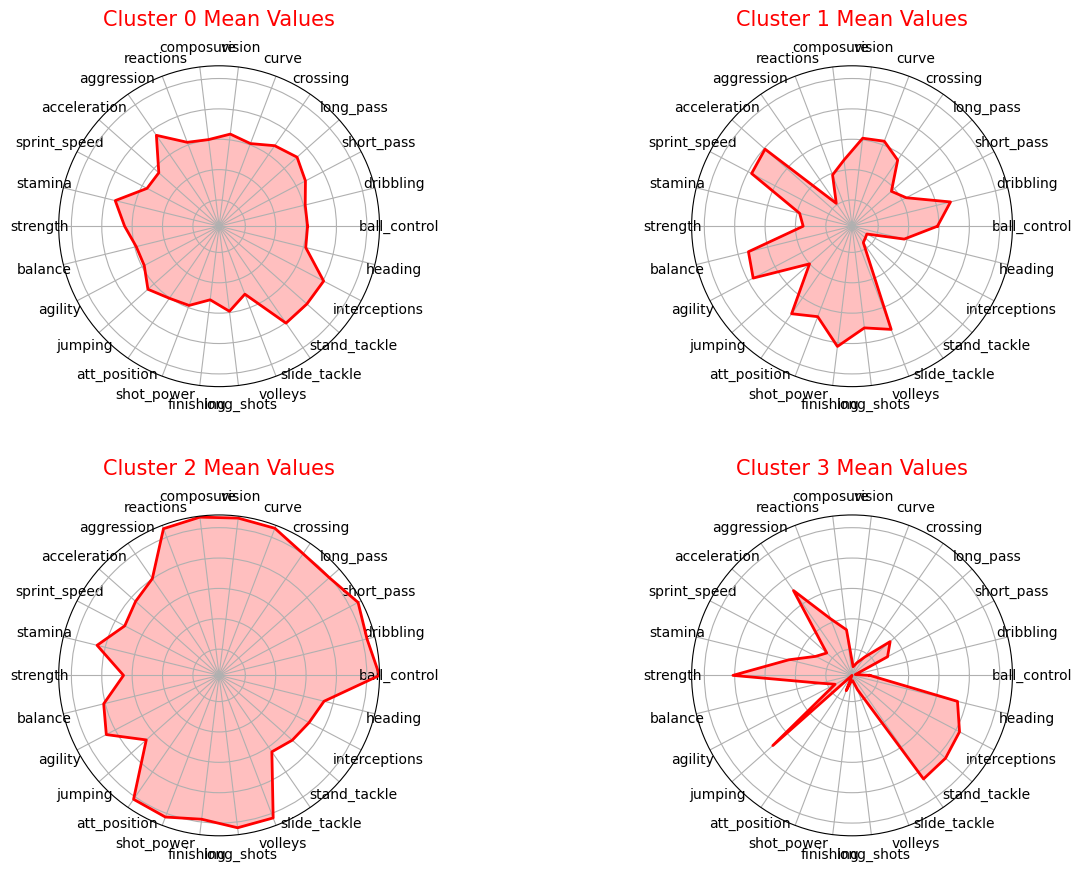

In [39]:
# Define the maximum range for all attributes in order to have the same scale
max_range_gmm = cluster_analysis_gmm.max().max()
min_range_gmm = cluster_analysis_gmm.min().min()
print("min_range_gmm",min_range_gmm,"  max_range_gmm",max_range_gmm)

# Plot radar charts in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10), subplot_kw=dict(polar=True))

# Adjust the space between plots
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot each cluster's radar chart
for i, ax in enumerate(axs.flat):
    if i < optimal_k:
        cluster_data = cluster_analysis_gmm.loc[i]
        plot_radar_chart(ax, cluster_data, i, min_range_gmm, max_range_gmm)
    else:
        fig.delaxes(ax)  # Remove possibly empty subplots

plt.show()

The radar charts for GMM Clustering closely resemble those from K-Means and Agglomerative Clustering, further validating the consistency of the segmentation:  

- **Cluster 0** highlights physically dominant players with high stamina, strength, and aggression, fitting the profile of box-to-box midfielders or defensive enforcers.
- **Cluster 1** includes attacking players with strong finishing, shot power, and sprint speed, likely strikers or offensive midfielders.
- **Cluster 2** consists of technically skilled players with strong dribbling, ball control, and passing, resembling creative midfielders or forwards.
- **Cluster 3** groups defensive players excelling in tackling, interceptions, and aerial duels, aligning with center-backs or defensive midfielders.

The similarities across all three methods confirm the reliability of the clustering results in distinguishing player roles effectively.

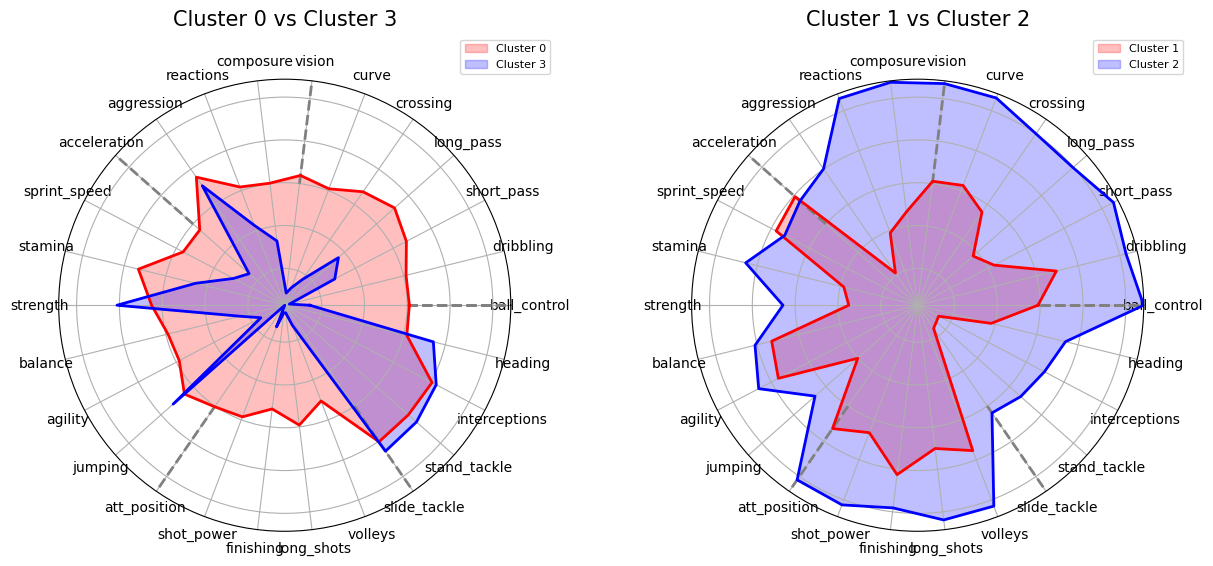

In [40]:
# Plot radar charts in a 1x2 grid
fig, axs = plt.subplots(1, 2, figsize=(14, 10), subplot_kw=dict(polar=True))

# Adjust the space between plots
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot each cluster's radar chart
for i, ax in enumerate(axs.flat):
    if i == 0:
        cluster_num_1 = 0
        cluster_num_2 = 3
        cluster_data_1 = cluster_analysis_gmm.loc[cluster_num_1]
        cluster_data_2 = cluster_analysis_gmm.loc[cluster_num_2]
        plot_overlapped_radar_chart(ax, cluster_data_1, cluster_num_1, cluster_data_2, cluster_num_2, min_range_gmm, max_range_gmm)
        ax.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1), fontsize=8)
    else:
        cluster_num_1 = 1
        cluster_num_2 = 2
        cluster_data_1 = cluster_analysis_gmm.loc[cluster_num_1]
        cluster_data_2 = cluster_analysis_gmm.loc[cluster_num_2]
        plot_overlapped_radar_chart(ax, cluster_data_1, cluster_num_1, cluster_data_2, cluster_num_2, min_range_gmm, max_range_gmm)
        ax.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1), fontsize=8)

plt.show()

The left radar chart follows the same pattern observed in the other methods, comparing two defensive clusters. Cluster 0 (red) displays a well-balanced defensive profile with strong interception and stamina values, suggesting high-level defenders. Cluster 3 (blue) is more physically oriented, emphasizing strength and aggression over technical skills, aligning with physically dominant but less mobile defenders.

The right radar chart, much like in K-Means and Agglomerative Clustering, highlights the contrast between Cluster 1 and Cluster 2. Cluster 2 (blue) dominates in technical and creative attributes, representing top-tier attacking players such as playmakers or offensive midfielders. Cluster 1 (red), while still offensive, relies more on speed and physicality, making these players effective but less refined attackers. 

# **CONCLUSIONS**

In this project, we explored different clustering techniques to categorize football players based on their attributes. By comparing K-Means, Agglomerative Clustering, and Gaussian Mixture Model, we aimed to identify meaningful player archetypes and evaluate the effectiveness of each method. The final comparison highlights key differences and insights gained from each approach.

In [41]:
# Function to create overlapped radar chart for 3 clusters
def plot_three_overlapped_radar_chart(ax, cluster_data_1, cluster_num_1, cluster_data_2, cluster_num_2, cluster_data_3, cluster_num_3, min_range, max_range):
    labels = cluster_data_1.index
    values_1 = cluster_data_1.values
    values_2 = cluster_data_2.values
    values_3 = cluster_data_3.values
    num_vars = len(labels)

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values_1 = np.concatenate((values_1, [values_1[0]]))
    values_2 = np.concatenate((values_2, [values_2[0]]))
    values_3 = np.concatenate((values_3, [values_3[0]]))
    angles += angles[:1]

    # Highlight sector boundaries
    start_angle = 0
    for i, (category, attrs) in enumerate(attribute_categories.items()):
        num_attrs = len(attrs)
        end_angle = start_angle + (num_attrs / num_vars) * 2 * np.pi
        ax.plot([start_angle, start_angle], [0, max_range], color='grey', linewidth=2, linestyle='--')
        start_angle = end_angle
    # Plot the last boundary to close the circle
    ax.plot([end_angle, end_angle], [0, max_range], color='grey', linewidth=2, linestyle='--')


    # Plot first cluster
    ax.fill(angles, values_1, color='red', alpha=0.25, label=f'K-Means Clustering')
    ax.plot(angles, values_1, color='red', linewidth=2)

    # Plot second cluster
    ax.fill(angles, values_2, color='blue', alpha=0.25, label=f'Agglomerative Clustering')
    ax.plot(angles, values_2, color='blue', linewidth=2)

    # Plot third cluster
    ax.fill(angles, values_3, color='green', alpha=0.25, label=f'Gaussian Mixture Model')
    ax.plot(angles, values_3, color='green', linewidth=2)

    # Set same range for all charts
    ax.set_ylim(min_range, max_range)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Title
    ax.set_title(f'Final Comparison', size=15, color='black', y=1.1)

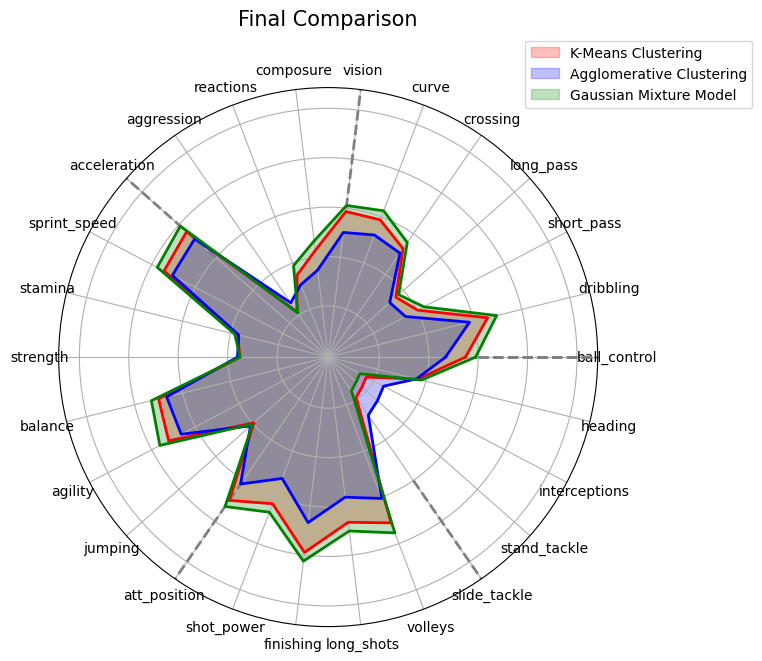

In [42]:
# Select three clusters to compare
min_range_tot = cluster_analysis_agg.min().min()
max_range_tot = cluster_analysis_gmm.max().max()

cluster_num_1 = 0
cluster_num_2 = 0
cluster_num_3 = 1
cluster_data_1 = cluster_analysis.loc[cluster_num_1]
cluster_data_2 = cluster_analysis_agg.loc[cluster_num_2]
cluster_data_3 = cluster_analysis_gmm.loc[cluster_num_3]

# Plot the overlapped radar chart
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
plot_three_overlapped_radar_chart(ax, cluster_data_1, cluster_num_1, cluster_data_2, cluster_num_2, cluster_data_3, cluster_num_3, min_range_tot, max_range_tot)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

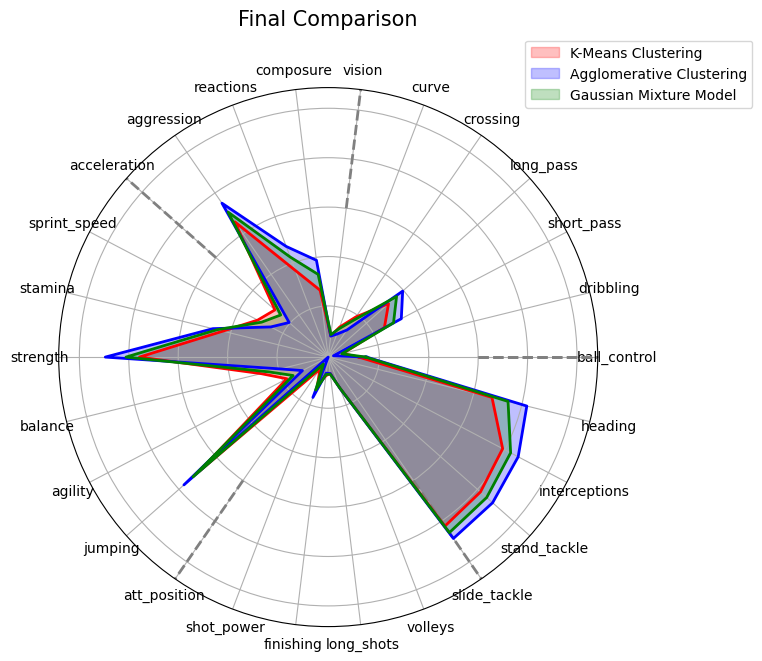

In [43]:
# Select three clusters to compare
cluster_num_1 = 1
cluster_num_2 = 1
cluster_num_3 = 3
cluster_data_1 = cluster_analysis.loc[cluster_num_1]
cluster_data_2 = cluster_analysis_agg.loc[cluster_num_2]
cluster_data_3 = cluster_analysis_gmm.loc[cluster_num_3]

# Plot the overlapped radar chart
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
plot_three_overlapped_radar_chart(ax, cluster_data_1, cluster_num_1, cluster_data_2, cluster_num_2, cluster_data_3, cluster_num_3, min_range_tot, max_range_tot)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

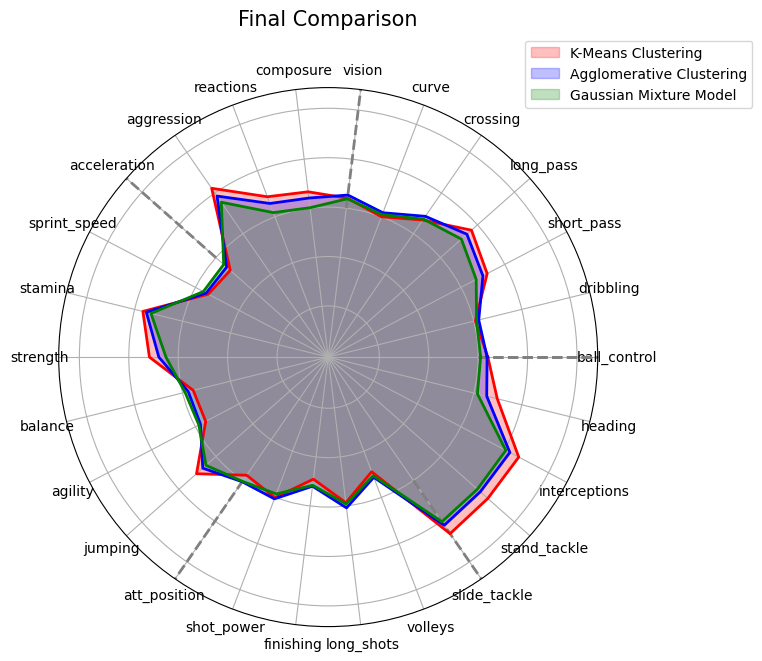

In [44]:
# Select three clusters to compare
cluster_num_1 = 2
cluster_num_2 = 3
cluster_num_3 = 0
cluster_data_1 = cluster_analysis.loc[cluster_num_1]
cluster_data_2 = cluster_analysis_agg.loc[cluster_num_2]
cluster_data_3 = cluster_analysis_gmm.loc[cluster_num_3]

# Plot the overlapped radar chart
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
plot_three_overlapped_radar_chart(ax, cluster_data_1, cluster_num_1, cluster_data_2, cluster_num_2, cluster_data_3, cluster_num_3, min_range_tot, max_range_tot)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

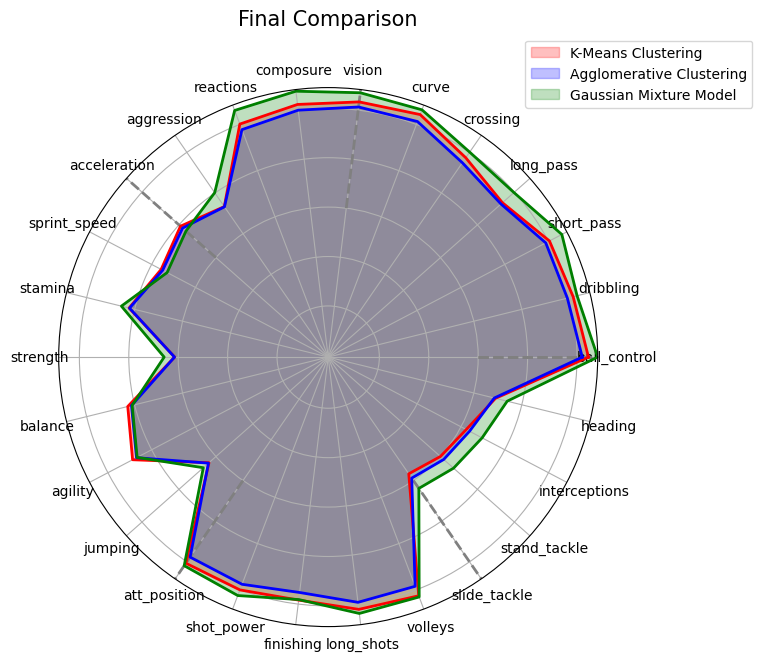

In [45]:
# Select three clusters to compare
cluster_num_1 = 3
cluster_num_2 = 2
cluster_num_3 = 2
cluster_data_1 = cluster_analysis.loc[cluster_num_1]
cluster_data_2 = cluster_analysis_agg.loc[cluster_num_2]
cluster_data_3 = cluster_analysis_gmm.loc[cluster_num_3]

# Plot the overlapped radar chart
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
plot_three_overlapped_radar_chart(ax, cluster_data_1, cluster_num_1, cluster_data_2, cluster_num_2, cluster_data_3, cluster_num_3, min_range_tot, max_range_tot)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

The comparative radar charts provide a clear visualization of how each clustering method—K-Means, Agglomerative Clustering, and Gaussian Mixture Model—groups players based on their skill sets. By overlaying the corresponding clusters from each method, we can assess the consistency and differences across approaches.

Overall, the analysis reveals that:
- Cluster Similarities: Despite differences in methodology, the three clustering techniques generally produce clusters with comparable attribute distributions, suggesting that the underlying player archetypes are well-defined within the dataset.
- Interpretability vs. Flexibility: K-Means offers intuitive and well-separated clusters, making it a practical choice for straightforward analysis. Agglomerative Clustering follows a similar trend but is influenced by hierarchical linkage criteria. GMM, on the other hand, provides a probabilistic perspective, which can be beneficial in cases where players exhibit mixed characteristics across roles.
- Best Performing Approach: While no single method is definitively superior, the choice of clustering technique depends on the specific goals of the analysis. If a rigid, well-defined segmentation is preferred, K-Means or Agglomerative Clustering are suitable choices. However, if flexibility and probabilistic interpretations are needed, GMM proves advantageous.

This multi-method approach ensures a comprehensive understanding of player grouping, demonstrating the strengths and trade-offs of different unsupervised learning techniques in sports analytics.